# Derivatives Homework1 - Bolun Zhang

## Question 1
Estimate the forward price of Intel Stock (INTC) one year from now, assuming
1. Trade Date: September 18 2019, end-of-day
2. Settlement Date: September 18, 2020 end-of-day
3. Dividend stream over the last 11 distribution dates:

Assume a flat discount rate of 2.25%. State your assumptions on future dividend rates clearly.  
Also, calculate the equivalent continuously compounded implied dividend yield.

| Date      | Dividend($) |
|-----------|-------------|
| 6-Aug-19  | 0.315       |
| 6-May-19  | 0.315       |
| 6-Feb-19  | 0.315       |
| 6-Nov-18  | 0.3         |
| 6-Aug-18  | 0.3         |
| 4-May-18  | 0.3         |
| 6-Feb-18  | 0.3         |
| 6-Nov-17  | 0.273       |
| 3-Aug-17  | 0.273       |
| 3-May-17  | 0.273       |
| 3-Feb-17  | 0.26        |
| 3-Nov-16  | 0.26        |

In [1]:
interest_rate = 2.25 / 100

Since the trade date is 9/18/2019, based on [Yahoo Finance](https://finance.yahoo.com/quote/INTC/history?period1=1568779200&period2=1568779200&interval=1d&filter=history&frequency=1d) we know the spot price at that end of day was 51.74.

In [2]:
spot_price = 51.74

Based on no-arbitrage law, we know that the one year forward price F0 must satisfy:  

$$F_{0}=S_{0}e^{(r-q)T}$$  

where $r$ is the interest rate, $T$ is the compounding period, $S_{0}$ is the spot price, and $q$ is the continuously compounding dividend yield rate.

Therefore, let's compute $q$ first.  
Based on [Nasdaq](https://www.nasdaq.com/market-activity/stocks/intc/dividend-history), we can see that the annual compounding yield rate is $2.45\%$

In [3]:
annual_yield_rate = 2.45 / 100

In [4]:
import math
continuous_yield_rate = math.log(1 + annual_yield_rate)
print(f"continuous_yield_rate={continuous_yield_rate*100}%")

continuous_yield_rate=2.420468869681736%


As shown above, the equivalent continuously compounded implied dividend yield is $2.42\%$.

Now that we have all the variables, we can calculate one year forward price:

In [5]:
years = 1
forward_price = spot_price * math.exp(interest_rate - continuous_yield_rate) * years
print(f"One year forward price is estimated to be ${forward_price}.")

One year forward price is estimated to be $51.651874541404034.


## Question 2

The S&P 500 index level was SPX= 2995.69 on September 17, 2019 at 12:38 EST. At the same time the term structure of ES futures was：


| Futures | Price |
|---------|-------|
|  Sep-19 |2997.25|
|  Dec-19 |2999.75|
|  Mar-19 | 3002  |

###  Assuming an interest rate of 2.25%, compute the implied dividend yield for the period until the March 2020 settlement date.

In [6]:
interest_rate = 2.25 / 100
spot_price_sep_17 = 2995.69
future_price_dec_19 = 2999.75

Based on $$F_{0,T}=I_{0}e^{(r-q)T}$$  
we have $$q=r-\frac{1}{T}\ln(\frac{F_{0,T}}{I_{0}})$$

In [7]:
t = 93 / 365  # Sep 17th - Dec 19th
implied_dividend_yield = interest_rate - 1/t*math.log(future_price_dec_19/spot_price_sep_17)
print(f"The implied dividend yield is {implied_dividend_yield*100}%")

The implied dividend yield is 1.7184489866346582%


###  The SPY price quoted at that time was $300.00. Compare with the SPY dividend yield from Yahoo!Finance. Is there an arbitrage by carrying SPY vs a mirror futures position? Explain.

Based on [Yahoo Finance](https://finance.yahoo.com/quote/spy?ltr=1), SPY has a yield of $1.85\%$.

In [8]:
yield_delta = implied_dividend_yield - 1.85 /100
print(f"yield_delta={yield_delta*100}%")

yield_delta=-0.13155101336534206%


Therefore, SPY generates a better yield than carrying a SPX future by 0.13% in terms of continuous compounding. An arbitrage trade could be possible but the margin is very little. In practice, we must take into acct also bid/ask and other transaction costs.

## Question 3

According to the CME specifications for the WTI futures contract
``Trading terminates 3 business day prior to the 25th calendar day of the month prior to the contract month. If the 25th calendar day is not a business day, trading terminates 4 business day prior 25th calendar day.’’

### Make a table in which you calculate the termination dates for the front-month WTI contract since Jan1 2017. The first column should contain the actual date (from Jan 1 2017 to Sep 10 2019, the second column should contain the corresponding termination date for the first live contract (OCT 2019 for dates in the beginning of Sep 2019).

In [9]:
start, end = (2017,1,1), (2019,9,10)

In [10]:
import calendar, datetime, dateutil
import pandas as pd
from pandas.tseries.offsets import BDay

def get_termination_date_for_year_month(year, month):
    this_day = pd.datetime(year, month, 25)
    if this_day in pd.bdate_range(pd.datetime(2017,1,1), pd.datetime(2019,12,31)):
        # today is business day
        return this_day - BDay(3)
    else:
        # today is not business day
        return this_day - BDay(4)


c = calendar.Calendar()

#print(f"{get_termination_date_for_year_month(2019,8)}")
day2termday = dict()

done = False
for year in range(2017, 2020):
    for month in range(1,13):
        for this_day in c.itermonthdates(year, month):
            if this_day >= datetime.date(*start) and this_day <= datetime.date(*end):
                term_date = get_termination_date_for_year_month(year, month).to_pydatetime().date()
                if this_day >= term_date:
                    next_month = 1 if month == 12 else ( month + 1 )
                    term_date = get_termination_date_for_year_month(year, next_month).to_pydatetime().date()
                    # print(f"{this_day} {term_date}")
                day2termday[this_day] = term_date
                

# for d in c.itermonthdates(2017,9):
#     print(d)

In [11]:
# print("|    Date    |  Term Date |")
# print("|------------|------------|")

# for k,v in day2termday.items():
#     print(f"| {str(k)} | {str(v)} |")

**Please refer to the Final Table at the very end for data.**

### Based on the data provided (myWTI.xlsx), add two more columns. The first column is the front month contract price. The second column is the second month contract price.

In [12]:
import csv
import os
import collections
import math


MIWTI = "/Users/bolunz/Documents/NYU/derivatives/hw/futurePrices.csv"
date2prices = collections.defaultdict(list)

with open(MIWTI, mode='r', ) as new_csv:
            csv_reader = csv.DictReader(new_csv, delimiter='|')
            for row in csv_reader:
                new_header = row.keys()
                # print(row["DATE"][-4:])
                if row["DATE"][-4:] < "2017":
                    continue
                for key, val in row.items():
                    if key == "DATE":
                        continue
                    if val != "":
                        date2prices[row["DATE"]] += [val]



In [13]:
#date2prices

In [14]:
MONTH = dict()
MONTH[1]="Jan"
MONTH[2]="Feb"
MONTH[3]="Mar"
MONTH[4]="Apr"
MONTH[5]="May"
MONTH[6]="Jun"
MONTH[7]="Jul"
MONTH[8]="Aug"
MONTH[9]="Sep"
MONTH[10]="Oct"
MONTH[11]="Nov"
MONTH[12]="Dec"

def get_key(d):
    return MONTH[d.month] + " " + ("0" if d.day < 10 else "") + str(d.day) + ", " + str(d.year)


#print("|    Date    |  Term Date |  Front Cont|  2nd Cont |")
#print("|------------|------------|------------|-----------|")

for k,v in day2termday.items():
    dkey = get_key(k)
    month1 = date2prices[dkey][0] if len(date2prices[dkey]) >= 1 else ""
    month2 = date2prices[dkey][1] if len(date2prices[dkey]) >= 2 else ""
    
    #print(f"| {str(k)} | {str(v)} | {month1} | {month2} |")

**Please refer to the Final Table at the very end for data.**

### Add an additional column to the table, which consists of daily returns from a strategy which invests in the front month contact if the date is less than the 15th of the delivery month and invests in the next-month contract if the date is greater than the 15th of the current calendar month. We call this a ``rolling futures’’ strategy. [Hint: use the termination date to determine when the 2nd month ``becomes’’ the front contract. This allows the accurate computation of the return around this date.]

In [15]:
delta_pnl = []
yest_month1, yest_month2 = None, None

date2pnl = collections.defaultdict(int)

for today,term_day in day2termday.items():
    dkey = get_key(today)
    prices = date2prices[dkey]

    # if no front month price at all, today is not a trading day
    if len(prices) == 0:
        continue

    month1 = date2prices[dkey][0] if len(date2prices[dkey]) >= 1 else ""
    month2 = date2prices[dkey][1] if len(date2prices[dkey]) >= 2 else ""

    if yest_month1 is None and yest_month2 is None:
        yest_month1 = month1
        yest_month2 = month2


    # 1st ~ 14th, invest in the front month contract
    if today.day >= 1 and today.day <= 15:
        date2pnl[today] = float(month1) - float(yest_month1)
        delta_pnl += [ float(month1) - float(yest_month1) ]

    # before term day, when 2nd month become front month, but investing in 2nd month
    elif today.day > 15 and (today.month == term_day.month and today.day < term_day.day):
        date2pnl[today] =  float(month2) - float(yest_month2)
        delta_pnl += [ float(month2) - float(yest_month2) ]

    # on the term day for this month, today's date is yesterday's term day
    elif today == day2termday[today-datetime.timedelta(1)]:
        date2pnl[today] = float(month1) - float(yest_month2)
        delta_pnl += [ float(month1) - float(yest_month2) ]

    # after term day, all the old 2nd month become front month
    else:
        date2pnl[today] = float(month1) - float(yest_month1) 
        delta_pnl += [ float(month1) - float(yest_month1) ]

    yest_month1 = month1
    yest_month2 = month2

In [16]:
sum(delta_pnl)

1.1600000000000108

### Compare the P/L of investing in this strategy to the chart of WTI for the same period. What do you find? Compare this strategy with an investment in USO for the same period. Analyze.

Based on [Yahoo Finance](https://finance.yahoo.com/quote/USO/history?period1=1483246800&period2=1568088000&interval=1d&filter=history&frequency=1d), the USO closing price for 2017/01/03 and 2019/09/10 are \\$11.44 and \\$11.98

In [17]:
uso_pnl = 11.98 - 11.44
uso_pnl

0.5400000000000009

In [18]:
to_date_pnl = [sum(delta_pnl[:i+1]) for i in range(len(delta_pnl))]

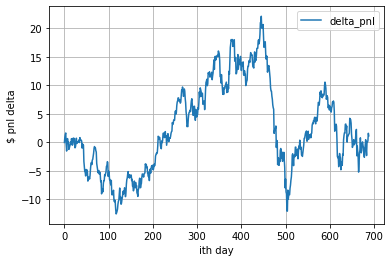

In [21]:
import matplotlib.pyplot as plt

#Plot the three lines
plt.plot(list(range(len(to_date_pnl))),to_date_pnl,label="delta_pnl")

## Configure the graph
plt.title('')
plt.xlabel('ith day')
plt.ylabel('$ pnl delta')
plt.legend()
plt.grid(True)

plt.show;

Compare this graph to [Yahoo Finance chart](https://yhoo.it/2V9qCkt) for USO between 2017/01/01 and 2019/09/10: ![USO chart](USO.png)

As shown, our strategy very closely tracks the price of USO.

### Compare the P/L of investing in this strategy to the chart of WTI for the same period. What do you find? Compare this strategy with an investment in USO for the same period. Analyze.

Compare this graph to [Yahoo Finance chart](https://yhoo.it/2LK5kqz) for WTI between 2017/01/01 and 2019/09/10: ![WTI chart](WTI.png)

As a result, we know that rolled futures funds like USO should underperform the commodity in times when there is contango, or upward sloping futures curve.

### Final Table

In [20]:
# print("|    Date    |  Term Date |  Front Cont|  2nd Cont |Roll MtM P&L |")
# print("|------------|------------|------------|-----------|-------------|")

for k,v in day2termday.items():
    dkey = get_key(k)
    month1 = date2prices[dkey][0] if len(date2prices[dkey]) >= 1 else ""
    month2 = date2prices[dkey][1] if len(date2prices[dkey]) >= 2 else ""
    
    # print(f"| {str(k)} | {str(v)} | {month1} | {month2} | {date2pnl[k]} |")

|    Date    |  Term Date |  Front Cont|  2nd Cont |Roll MtM P&L |
|------------|------------|------------|-----------|-------------|
| 2017-01-01 | 2017-01-20 |  |  | 0 |
| 2017-01-02 | 2017-01-20 |  |  | 0 |
| 2017-01-03 | 2017-01-20 | 52.33 | 53.29 | 0.0 |
| 2017-01-04 | 2017-01-20 | 53.26 | 54.22 | 0.9299999999999997 |
| 2017-01-05 | 2017-01-20 | 53.76 | 54.68 | 0.5 |
| 2017-01-06 | 2017-01-20 | 53.99 | 54.87 | 0.23000000000000398 |
| 2017-01-07 | 2017-01-20 |  |  | 0 |
| 2017-01-08 | 2017-01-20 |  |  | 0 |
| 2017-01-09 | 2017-01-20 | 51.96 | 52.87 | -2.030000000000001 |
| 2017-01-10 | 2017-01-20 | 50.82 | 51.7 | -1.1400000000000006 |
| 2017-01-11 | 2017-01-20 | 52.25 | 53.06 | 1.4299999999999997 |
| 2017-01-12 | 2017-01-20 | 53.01 | 53.84 | 0.759999999999998 |
| 2017-01-13 | 2017-01-20 | 52.37 | 53.15 | -0.6400000000000006 |
| 2017-01-14 | 2017-01-20 |  |  | 0 |
| 2017-01-15 | 2017-01-20 |  |  | 0 |
| 2017-01-16 | 2017-01-20 |  |  | 0 |
| 2017-01-17 | 2017-01-20 | 52.48 | 53.26 | 0.10999999999999943 |
| 2017-01-18 | 2017-01-20 | 51.08 | 51.89 | -1.3699999999999974 |
| 2017-01-19 | 2017-01-20 | 51.37 | 52.12 | 0.22999999999999687 |
| 2017-01-20 | 2017-02-21 | 52.42 | 53.22 | 0.30000000000000426 |
| 2017-01-21 | 2017-02-21 |  |  | 0 |
| 2017-01-22 | 2017-02-21 |  |  | 0 |
| 2017-01-23 | 2017-02-21 | 52.75 | 53.5 | 0.3299999999999983 |
| 2017-01-24 | 2017-02-21 | 53.18 | 53.86 | 0.4299999999999997 |
| 2017-01-25 | 2017-02-21 | 52.75 | 53.39 | -0.4299999999999997 |
| 2017-01-26 | 2017-02-21 | 53.78 | 54.38 | 1.0300000000000011 |
| 2017-01-27 | 2017-02-21 | 53.17 | 53.75 | -0.6099999999999994 |
| 2017-01-28 | 2017-02-21 |  |  | 0 |
| 2017-01-29 | 2017-02-21 |  |  | 0 |
| 2017-01-30 | 2017-02-21 | 52.63 | 53.24 | -0.5399999999999991 |
| 2017-01-31 | 2017-02-21 | 52.81 | 53.42 | 0.17999999999999972 |
| 2017-02-01 | 2017-02-21 | 53.88 | 54.49 | 1.0700000000000003 |
| 2017-02-02 | 2017-02-21 | 53.54 | 54.17 | -0.3400000000000034 |
| 2017-02-03 | 2017-02-21 | 53.83 | 54.47 | 0.28999999999999915 |
| 2017-02-04 | 2017-02-21 |  |  | 0 |
| 2017-02-05 | 2017-02-21 |  |  | 0 |
| 2017-02-06 | 2017-02-21 | 53.01 | 53.63 | -0.8200000000000003 |
| 2017-02-07 | 2017-02-21 | 52.17 | 52.78 | -0.8399999999999963 |
| 2017-02-08 | 2017-02-21 | 52.34 | 52.91 | 0.1700000000000017 |
| 2017-02-09 | 2017-02-21 | 53 | 53.46 | 0.6599999999999966 |
| 2017-02-10 | 2017-02-21 | 53.86 | 54.33 | 0.8599999999999994 |
| 2017-02-11 | 2017-02-21 |  |  | 0 |
| 2017-02-12 | 2017-02-21 |  |  | 0 |
| 2017-02-13 | 2017-02-21 | 52.93 | 53.43 | -0.9299999999999997 |
| 2017-02-14 | 2017-02-21 | 53.2 | 53.71 | 0.2700000000000031 |
| 2017-02-15 | 2017-02-21 | 53.11 | 53.6 | -0.09000000000000341 |
| 2017-02-16 | 2017-02-21 | 53.36 | 53.75 | 0.14999999999999858 |
| 2017-02-17 | 2017-02-21 | 53.4 | 53.78 | 0.030000000000001137 |
| 2017-02-18 | 2017-02-21 |  |  | 0 |
| 2017-02-19 | 2017-02-21 |  |  | 0 |
| 2017-02-20 | 2017-02-21 |  |  | 0 |
| 2017-02-21 | 2017-03-21 | 54.06 | 54.33 | 0.28000000000000114 |
| 2017-02-22 | 2017-03-21 | 53.59 | 53.93 | -0.46999999999999886 |
| 2017-02-23 | 2017-03-21 | 54.45 | 54.76 | 0.8599999999999994 |
| 2017-02-24 | 2017-03-21 | 53.99 | 54.32 | -0.46000000000000085 |
| 2017-02-25 | 2017-03-21 |  |  | 0 |
| 2017-02-26 | 2017-03-21 |  |  | 0 |
| 2017-02-27 | 2017-03-21 | 54.05 | 54.42 | 0.05999999999999517 |
| 2017-02-28 | 2017-03-21 | 54.01 | 54.43 | -0.03999999999999915 |
| 2017-03-01 | 2017-03-21 | 53.83 | 54.28 | -0.17999999999999972 |
| 2017-03-02 | 2017-03-21 | 52.61 | 53.07 | -1.2199999999999989 |
| 2017-03-03 | 2017-03-21 | 53.33 | 53.78 | 0.7199999999999989 |
| 2017-03-04 | 2017-03-21 |  |  | 0 |
| 2017-03-05 | 2017-03-21 |  |  | 0 |
| 2017-03-06 | 2017-03-21 | 53.2 | 53.71 | -0.12999999999999545 |
| 2017-03-07 | 2017-03-21 | 53.14 | 53.64 | -0.060000000000002274 |
| 2017-03-08 | 2017-03-21 | 50.28 | 50.83 | -2.8599999999999994 |
| 2017-03-09 | 2017-03-21 | 49.28 | 49.83 | -1.0 |
| 2017-03-10 | 2017-03-21 | 48.49 | 49.03 | -0.7899999999999991 |
| 2017-03-11 | 2017-03-21 |  |  | 0 |
| 2017-03-12 | 2017-03-21 |  |  | 0 |
| 2017-03-13 | 2017-03-21 | 48.4 | 48.94 | -0.09000000000000341 |
| 2017-03-14 | 2017-03-21 | 47.72 | 48.35 | -0.6799999999999997 |
| 2017-03-15 | 2017-03-21 | 48.86 | 49.38 | 1.1400000000000006 |
| 2017-03-16 | 2017-03-21 | 48.75 | 49.24 | -0.14000000000000057 |
| 2017-03-17 | 2017-03-21 | 48.78 | 49.31 | 0.07000000000000028 |
| 2017-03-18 | 2017-03-21 |  |  | 0 |
| 2017-03-19 | 2017-03-21 |  |  | 0 |
| 2017-03-20 | 2017-03-21 | 48.22 | 48.91 | -0.4000000000000057 |
| 2017-03-21 | 2017-04-20 | 47.34 | 48.24 | -1.5699999999999932 |
| 2017-03-22 | 2017-04-20 | 48.04 | 48.58 | 0.6999999999999957 |
| 2017-03-23 | 2017-04-20 | 47.7 | 48.26 | -0.3399999999999963 |
| 2017-03-24 | 2017-04-20 | 47.97 | 48.51 | 0.269999999999996 |
| 2017-03-25 | 2017-04-20 |  |  | 0 |
| 2017-03-26 | 2017-04-20 |  |  | 0 |
| 2017-03-27 | 2017-04-20 | 47.73 | 48.3 | -0.240000000000002 |
| 2017-03-28 | 2017-04-20 | 48.37 | 48.9 | 0.6400000000000006 |
| 2017-03-29 | 2017-04-20 | 49.51 | 50 | 1.1400000000000006 |
| 2017-03-30 | 2017-04-20 | 50.35 | 50.78 | 0.8400000000000034 |
| 2017-03-31 | 2017-04-20 | 50.6 | 51.07 | 0.25 |
| 2017-04-01 | 2017-04-20 |  |  | 0 |
| 2017-04-02 | 2017-04-20 |  |  | 0 |
| 2017-04-03 | 2017-04-20 | 50.24 | 50.71 | -0.35999999999999943 |
| 2017-04-04 | 2017-04-20 | 51.03 | 51.51 | 0.7899999999999991 |
| 2017-04-05 | 2017-04-20 | 51.15 | 51.6 | 0.11999999999999744 |
| 2017-04-06 | 2017-04-20 | 51.7 | 52.13 | 0.5500000000000043 |
| 2017-04-07 | 2017-04-20 | 52.24 | 52.64 | 0.5399999999999991 |
| 2017-04-08 | 2017-04-20 |  |  | 0 |
| 2017-04-09 | 2017-04-20 |  |  | 0 |
| 2017-04-10 | 2017-04-20 | 53.08 | 53.48 | 0.8399999999999963 |
| 2017-04-11 | 2017-04-20 | 53.4 | 53.79 | 0.3200000000000003 |
| 2017-04-12 | 2017-04-20 | 53.11 | 53.52 | -0.28999999999999915 |
| 2017-04-13 | 2017-04-20 | 53.18 | 53.6 | 0.07000000000000028 |
| 2017-04-14 | 2017-04-20 |  |  | 0 |
| 2017-04-15 | 2017-04-20 |  |  | 0 |
| 2017-04-16 | 2017-04-20 |  |  | 0 |
| 2017-04-17 | 2017-04-20 | 52.65 | 53.11 | -0.490000000000002 |
| 2017-04-18 | 2017-04-20 | 52.41 | 52.85 | -0.259999999999998 |
| 2017-04-19 | 2017-04-20 | 50.44 | 50.85 | -2.0 |
| 2017-04-20 | 2017-05-22 | 50.27 | 50.71 | -0.5799999999999983 |
| 2017-04-21 | 2017-05-22 | 49.62 | 49.97 | -0.6500000000000057 |
| 2017-04-22 | 2017-05-22 |  |  | 0 |
| 2017-04-23 | 2017-05-22 |  |  | 0 |
| 2017-04-24 | 2017-05-22 | 49.23 | 49.58 | -0.39000000000000057 |
| 2017-04-25 | 2017-05-22 | 49.56 | 49.9 | 0.3300000000000054 |
| 2017-04-26 | 2017-05-22 | 49.62 | 49.96 | 0.05999999999999517 |
| 2017-04-27 | 2017-05-22 | 48.97 | 49.31 | -0.6499999999999986 |
| 2017-04-28 | 2017-05-22 | 49.33 | 49.62 | 0.35999999999999943 |
| 2017-04-29 | 2017-05-22 |  |  | 0 |
| 2017-04-30 | 2017-05-22 |  |  | 0 |
| 2017-05-01 | 2017-05-22 | 48.84 | 49.16 | -0.4899999999999949 |
| 2017-05-02 | 2017-05-22 | 47.66 | 47.99 | -1.1800000000000068 |
| 2017-05-03 | 2017-05-22 | 47.82 | 48.18 | 0.1600000000000037 |
| 2017-05-04 | 2017-05-22 | 45.52 | 45.9 | -2.299999999999997 |
| 2017-05-05 | 2017-05-22 | 46.22 | 46.6 | 0.6999999999999957 |
| 2017-05-06 | 2017-05-22 |  |  | 0 |
| 2017-05-07 | 2017-05-22 |  |  | 0 |
| 2017-05-08 | 2017-05-22 | 46.43 | 46.84 | 0.21000000000000085 |
| 2017-05-09 | 2017-05-22 | 45.88 | 46.27 | -0.5499999999999972 |
| 2017-05-10 | 2017-05-22 | 47.33 | 47.7 | 1.4499999999999957 |
| 2017-05-11 | 2017-05-22 | 47.83 | 48.2 | 0.5 |
| 2017-05-12 | 2017-05-22 | 47.84 | 48.17 | 0.010000000000005116 |
| 2017-05-13 | 2017-05-22 |  |  | 0 |
| 2017-05-14 | 2017-05-22 |  |  | 0 |
| 2017-05-15 | 2017-05-22 | 48.85 | 49.16 | 1.009999999999998 |
| 2017-05-16 | 2017-05-22 | 48.66 | 49 | -0.1599999999999966 |
| 2017-05-17 | 2017-05-22 | 49.07 | 49.41 | 0.4099999999999966 |
| 2017-05-18 | 2017-05-22 | 49.35 | 49.66 | 0.25 |
| 2017-05-19 | 2017-05-22 | 50.33 | 50.67 | 1.0100000000000051 |
| 2017-05-20 | 2017-05-22 |  |  | 0 |
| 2017-05-21 | 2017-05-22 |  |  | 0 |
| 2017-05-22 | 2017-06-20 | 50.73 | 51.13 | 0.05999999999999517 |
| 2017-05-23 | 2017-06-20 | 51.47 | 51.72 | 0.740000000000002 |
| 2017-05-24 | 2017-06-20 | 51.36 | 51.59 | -0.10999999999999943 |
| 2017-05-25 | 2017-06-20 | 48.9 | 49.14 | -2.460000000000001 |
| 2017-05-26 | 2017-06-20 | 49.8 | 50.05 | 0.8999999999999986 |
| 2017-05-27 | 2017-06-20 |  |  | 0 |
| 2017-05-28 | 2017-06-20 |  |  | 0 |
| 2017-05-29 | 2017-06-20 |  |  | 0 |
| 2017-05-30 | 2017-06-20 | 49.66 | 49.91 | -0.14000000000000057 |
| 2017-05-31 | 2017-06-20 | 48.32 | 48.56 | -1.3399999999999963 |
| 2017-06-01 | 2017-06-20 | 48.36 | 48.6 | 0.03999999999999915 |
| 2017-06-02 | 2017-06-20 | 47.66 | 47.87 | -0.7000000000000028 |
| 2017-06-03 | 2017-06-20 |  |  | 0 |
| 2017-06-04 | 2017-06-20 |  |  | 0 |
| 2017-06-05 | 2017-06-20 | 47.4 | 47.58 | -0.259999999999998 |
| 2017-06-06 | 2017-06-20 | 48.19 | 48.34 | 0.7899999999999991 |
| 2017-06-07 | 2017-06-20 | 45.72 | 45.98 | -2.469999999999999 |
| 2017-06-08 | 2017-06-20 | 45.64 | 45.89 | -0.0799999999999983 |
| 2017-06-09 | 2017-06-20 | 45.83 | 46.07 | 0.18999999999999773 |
| 2017-06-10 | 2017-06-20 |  |  | 0 |
| 2017-06-11 | 2017-06-20 |  |  | 0 |
| 2017-06-12 | 2017-06-20 | 46.08 | 46.32 | 0.25 |
| 2017-06-13 | 2017-06-20 | 46.46 | 46.67 | 0.38000000000000256 |
| 2017-06-14 | 2017-06-20 | 44.73 | 44.93 | -1.730000000000004 |
| 2017-06-15 | 2017-06-20 | 44.46 | 44.68 | -0.269999999999996 |
| 2017-06-16 | 2017-06-20 | 44.74 | 44.97 | 0.28999999999999915 |
| 2017-06-17 | 2017-06-20 |  |  | 0 |
| 2017-06-18 | 2017-06-20 |  |  | 0 |
| 2017-06-19 | 2017-06-20 | 44.2 | 44.43 | -0.5399999999999991 |
| 2017-06-20 | 2017-07-20 | 43.23 | 43.51 | -1.2000000000000028 |
| 2017-06-21 | 2017-07-20 | 42.53 | 42.75 | -0.6999999999999957 |
| 2017-06-22 | 2017-07-20 | 42.74 | 42.97 | 0.21000000000000085 |
| 2017-06-23 | 2017-07-20 | 43.01 | 43.27 | 0.269999999999996 |
| 2017-06-24 | 2017-07-20 |  |  | 0 |
| 2017-06-25 | 2017-07-20 |  |  | 0 |
| 2017-06-26 | 2017-07-20 | 43.38 | 43.61 | 0.37000000000000455 |
| 2017-06-27 | 2017-07-20 | 44.24 | 44.49 | 0.8599999999999994 |
| 2017-06-28 | 2017-07-20 | 44.74 | 44.99 | 0.5 |
| 2017-06-29 | 2017-07-20 | 44.93 | 45.2 | 0.18999999999999773 |
| 2017-06-30 | 2017-07-20 | 46.04 | 46.29 | 1.1099999999999994 |
| 2017-07-01 | 2017-07-20 |  |  | 0 |
| 2017-07-02 | 2017-07-20 |  |  | 0 |
| 2017-07-03 | 2017-07-20 | 47.07 | 47.29 | 1.0300000000000011 |
| 2017-07-04 | 2017-07-20 |  |  | 0 |
| 2017-07-05 | 2017-07-20 | 45.13 | 45.34 | -1.9399999999999977 |
| 2017-07-06 | 2017-07-20 | 45.52 | 45.7 | 0.39000000000000057 |
| 2017-07-07 | 2017-07-20 | 44.23 | 44.39 | -1.2900000000000063 |
| 2017-07-08 | 2017-07-20 |  |  | 0 |
| 2017-07-09 | 2017-07-20 |  |  | 0 |
| 2017-07-10 | 2017-07-20 | 44.4 | 44.6 | 0.1700000000000017 |
| 2017-07-11 | 2017-07-20 | 45.04 | 45.23 | 0.6400000000000006 |
| 2017-07-12 | 2017-07-20 | 45.49 | 45.66 | 0.45000000000000284 |
| 2017-07-13 | 2017-07-20 | 46.08 | 46.25 | 0.5899999999999963 |
| 2017-07-14 | 2017-07-20 | 46.54 | 46.75 | 0.46000000000000085 |
| 2017-07-15 | 2017-07-20 |  |  | 0 |
| 2017-07-16 | 2017-07-20 |  |  | 0 |
| 2017-07-17 | 2017-07-20 | 46.02 | 46.23 | -0.5200000000000031 |
| 2017-07-18 | 2017-07-20 | 46.4 | 46.59 | 0.36000000000000654 |
| 2017-07-19 | 2017-07-20 | 47.12 | 47.32 | 0.7299999999999969 |
| 2017-07-20 | 2017-08-22 | 46.79 | 46.92 | -0.5300000000000011 |
| 2017-07-21 | 2017-08-22 | 45.77 | 45.95 | -1.019999999999996 |
| 2017-07-22 | 2017-08-22 |  |  | 0 |
| 2017-07-23 | 2017-08-22 |  |  | 0 |
| 2017-07-24 | 2017-08-22 | 46.34 | 46.51 | 0.5700000000000003 |
| 2017-07-25 | 2017-08-22 | 47.89 | 48.02 | 1.5499999999999972 |
| 2017-07-26 | 2017-08-22 | 48.75 | 48.85 | 0.8599999999999994 |
| 2017-07-27 | 2017-08-22 | 49.04 | 49.17 | 0.28999999999999915 |
| 2017-07-28 | 2017-08-22 | 49.71 | 49.81 | 0.6700000000000017 |
| 2017-07-29 | 2017-08-22 |  |  | 0 |
| 2017-07-30 | 2017-08-22 |  |  | 0 |
| 2017-07-31 | 2017-08-22 | 50.17 | 50.26 | 0.46000000000000085 |
| 2017-08-01 | 2017-08-22 | 49.16 | 49.29 | -1.0100000000000051 |
| 2017-08-02 | 2017-08-22 | 49.59 | 49.73 | 0.4300000000000068 |
| 2017-08-03 | 2017-08-22 | 49.03 | 49.19 | -0.5600000000000023 |
| 2017-08-04 | 2017-08-22 | 49.58 | 49.73 | 0.5499999999999972 |
| 2017-08-05 | 2017-08-22 |  |  | 0 |
| 2017-08-06 | 2017-08-22 |  |  | 0 |
| 2017-08-07 | 2017-08-22 | 49.39 | 49.57 | -0.18999999999999773 |
| 2017-08-08 | 2017-08-22 | 49.17 | 49.35 | -0.21999999999999886 |
| 2017-08-09 | 2017-08-22 | 49.56 | 49.72 | 0.39000000000000057 |
| 2017-08-10 | 2017-08-22 | 48.59 | 48.75 | -0.9699999999999989 |
| 2017-08-11 | 2017-08-22 | 48.82 | 48.97 | 0.22999999999999687 |
| 2017-08-12 | 2017-08-22 |  |  | 0 |
| 2017-08-13 | 2017-08-22 |  |  | 0 |
| 2017-08-14 | 2017-08-22 | 47.59 | 47.73 | -1.2299999999999969 |
| 2017-08-15 | 2017-08-22 | 47.55 | 47.7 | -0.04000000000000625 |
| 2017-08-16 | 2017-08-22 | 46.78 | 46.94 | -0.7600000000000051 |
| 2017-08-17 | 2017-08-22 | 47.09 | 47.24 | 0.30000000000000426 |
| 2017-08-18 | 2017-08-22 | 48.51 | 48.66 | 1.4199999999999946 |
| 2017-08-19 | 2017-08-22 |  |  | 0 |
| 2017-08-20 | 2017-08-22 |  |  | 0 |
| 2017-08-21 | 2017-08-22 | 47.37 | 47.53 | -1.1299999999999955 |
| 2017-08-22 | 2017-09-20 | 47.64 | 47.83 | 0.10999999999999943 |
| 2017-08-23 | 2017-09-20 | 48.41 | 48.62 | 0.769999999999996 |
| 2017-08-24 | 2017-09-20 | 47.43 | 47.7 | -0.9799999999999969 |
| 2017-08-25 | 2017-09-20 | 47.87 | 48.12 | 0.4399999999999977 |
| 2017-08-26 | 2017-09-20 |  |  | 0 |
| 2017-08-27 | 2017-09-20 |  |  | 0 |
| 2017-08-28 | 2017-09-20 | 46.57 | 46.96 | -1.2999999999999972 |
| 2017-08-29 | 2017-09-20 | 46.44 | 47 | -0.13000000000000256 |
| 2017-08-30 | 2017-09-20 | 45.96 | 46.51 | -0.4799999999999969 |
| 2017-08-31 | 2017-09-20 | 47.23 | 47.96 | 1.269999999999996 |
| 2017-09-01 | 2017-09-20 | 47.29 | 47.99 | 0.060000000000002274 |
| 2017-09-02 | 2017-09-20 |  |  | 0 |
| 2017-09-03 | 2017-09-20 |  |  | 0 |
| 2017-09-04 | 2017-09-20 |  |  | 0 |
| 2017-09-05 | 2017-09-20 | 48.66 | 49.14 | 1.3699999999999974 |
| 2017-09-06 | 2017-09-20 | 49.16 | 49.62 | 0.5 |
| 2017-09-07 | 2017-09-20 | 49.09 | 49.53 | -0.06999999999999318 |
| 2017-09-08 | 2017-09-20 | 47.48 | 48.06 | -1.6100000000000065 |
| 2017-09-09 | 2017-09-20 |  |  | 0 |
| 2017-09-10 | 2017-09-20 |  |  | 0 |
| 2017-09-11 | 2017-09-20 | 48.07 | 48.62 | 0.5900000000000034 |
| 2017-09-12 | 2017-09-20 | 48.23 | 48.75 | 0.1599999999999966 |
| 2017-09-13 | 2017-09-20 | 49.3 | 49.75 | 1.0700000000000003 |
| 2017-09-14 | 2017-09-20 | 49.89 | 50.35 | 0.5900000000000034 |
| 2017-09-15 | 2017-09-20 | 49.89 | 50.44 | 0.0 |
| 2017-09-16 | 2017-09-20 |  |  | 0 |
| 2017-09-17 | 2017-09-20 |  |  | 0 |
| 2017-09-18 | 2017-09-20 | 49.91 | 50.35 | -0.0899999999999963 |
| 2017-09-19 | 2017-09-20 | 49.48 | 49.9 | -0.45000000000000284 |
| 2017-09-20 | 2017-10-20 | 50.41 | 50.69 | 0.509999999999998 |
| 2017-09-21 | 2017-10-20 | 50.55 | 50.93 | 0.14000000000000057 |
| 2017-09-22 | 2017-10-20 | 50.66 | 51.03 | 0.10999999999999943 |
| 2017-09-23 | 2017-10-20 |  |  | 0 |
| 2017-09-24 | 2017-10-20 |  |  | 0 |
| 2017-09-25 | 2017-10-20 | 52.22 | 52.52 | 1.5600000000000023 |
| 2017-09-26 | 2017-10-20 | 51.88 | 52.19 | -0.3399999999999963 |
| 2017-09-27 | 2017-10-20 | 52.14 | 52.43 | 0.259999999999998 |
| 2017-09-28 | 2017-10-20 | 51.56 | 51.87 | -0.5799999999999983 |
| 2017-09-29 | 2017-10-20 | 51.67 | 51.95 | 0.10999999999999943 |
| 2017-09-30 | 2017-10-20 |  |  | 0 |
| 2017-10-01 | 2017-10-20 |  |  | 0 |
| 2017-10-02 | 2017-10-20 | 50.58 | 50.9 | -1.0900000000000034 |
| 2017-10-03 | 2017-10-20 | 50.42 | 50.74 | -0.1599999999999966 |
| 2017-10-04 | 2017-10-20 | 49.98 | 50.32 | -0.44000000000000483 |
| 2017-10-05 | 2017-10-20 | 50.79 | 51.15 | 0.8100000000000023 |
| 2017-10-06 | 2017-10-20 | 49.29 | 49.65 | -1.5 |
| 2017-10-07 | 2017-10-20 |  |  | 0 |
| 2017-10-08 | 2017-10-20 |  |  | 0 |
| 2017-10-09 | 2017-10-20 |  |  | 0 |
| 2017-10-10 | 2017-10-20 | 50.92 | 51.23 | 1.6300000000000026 |
| 2017-10-11 | 2017-10-20 | 51.3 | 51.6 | 0.37999999999999545 |
| 2017-10-12 | 2017-10-20 | 50.6 | 50.93 | -0.6999999999999957 |
| 2017-10-13 | 2017-10-20 | 51.45 | 51.73 | 0.8500000000000014 |
| 2017-10-14 | 2017-10-20 |  |  | 0 |
| 2017-10-15 | 2017-10-20 |  |  | 0 |
| 2017-10-16 | 2017-10-20 | 51.87 | 52.14 | 0.4100000000000037 |
| 2017-10-17 | 2017-10-20 | 51.88 | 52.11 | -0.030000000000001137 |
| 2017-10-18 | 2017-10-20 | 52.04 | 52.26 | 0.14999999999999858 |
| 2017-10-19 | 2017-10-20 | 51.29 | 51.51 | -0.75 |
| 2017-10-20 | 2017-11-21 | 51.47 | 51.84 | -0.03999999999999915 |
| 2017-10-21 | 2017-11-21 |  |  | 0 |
| 2017-10-22 | 2017-11-21 |  |  | 0 |
| 2017-10-23 | 2017-11-21 | 51.9 | 52.08 | 0.4299999999999997 |
| 2017-10-24 | 2017-11-21 | 52.47 | 52.67 | 0.5700000000000003 |
| 2017-10-25 | 2017-11-21 | 52.18 | 52.43 | -0.28999999999999915 |
| 2017-10-26 | 2017-11-21 | 52.64 | 52.86 | 0.46000000000000085 |
| 2017-10-27 | 2017-11-21 | 53.9 | 54.09 | 1.259999999999998 |
| 2017-10-28 | 2017-11-21 |  |  | 0 |
| 2017-10-29 | 2017-11-21 |  |  | 0 |
| 2017-10-30 | 2017-11-21 | 54.15 | 54.37 | 0.25 |
| 2017-10-31 | 2017-11-21 | 54.38 | 54.59 | 0.23000000000000398 |
| 2017-11-01 | 2017-11-21 | 54.3 | 54.51 | -0.0800000000000054 |
| 2017-11-02 | 2017-11-21 | 54.54 | 54.77 | 0.240000000000002 |
| 2017-11-03 | 2017-11-21 | 55.64 | 55.86 | 1.1000000000000014 |
| 2017-11-04 | 2017-11-21 |  |  | 0 |
| 2017-11-05 | 2017-11-21 |  |  | 0 |
| 2017-11-06 | 2017-11-21 | 57.35 | 57.57 | 1.7100000000000009 |
| 2017-11-07 | 2017-11-21 | 57.2 | 57.43 | -0.14999999999999858 |
| 2017-11-08 | 2017-11-21 | 56.81 | 57.05 | -0.39000000000000057 |
| 2017-11-09 | 2017-11-21 | 57.17 | 57.39 | 0.35999999999999943 |
| 2017-11-10 | 2017-11-21 |  |  | 0 |
| 2017-11-11 | 2017-11-21 |  |  | 0 |
| 2017-11-12 | 2017-11-21 |  |  | 0 |
| 2017-11-13 | 2017-11-21 | 56.76 | 56.97 | -0.4100000000000037 |
| 2017-11-14 | 2017-11-21 | 55.7 | 55.89 | -1.0599999999999952 |
| 2017-11-15 | 2017-11-21 | 55.33 | 55.52 | -0.37000000000000455 |
| 2017-11-16 | 2017-11-21 | 55.14 | 55.35 | -0.1700000000000017 |
| 2017-11-17 | 2017-11-21 | 56.55 | 56.71 | 1.3599999999999994 |
| 2017-11-18 | 2017-11-21 |  |  | 0 |
| 2017-11-19 | 2017-11-21 |  |  | 0 |
| 2017-11-20 | 2017-11-21 | 56.09 | 56.42 | -0.28999999999999915 |
| 2017-11-21 | 2017-12-20 | 56.83 | 56.92 | 0.4099999999999966 |
| 2017-11-22 | 2017-12-20 | 58.02 | 58.02 | 1.1900000000000048 |
| 2017-11-23 | 2017-12-20 |  |  | 0 |
| 2017-11-24 | 2017-12-20 |  |  | 0 |
| 2017-11-25 | 2017-12-20 |  |  | 0 |
| 2017-11-26 | 2017-12-20 |  |  | 0 |
| 2017-11-27 | 2017-12-20 | 58.11 | 58.16 | 0.0899999999999963 |
| 2017-11-28 | 2017-12-20 | 57.99 | 58.05 | -0.11999999999999744 |
| 2017-11-29 | 2017-12-20 | 57.3 | 57.36 | -0.6900000000000048 |
| 2017-11-30 | 2017-12-20 | 57.4 | 57.45 | 0.10000000000000142 |
| 2017-12-01 | 2017-12-20 | 58.36 | 58.38 | 0.9600000000000009 |
| 2017-12-02 | 2017-12-20 |  |  | 0 |
| 2017-12-03 | 2017-12-20 |  |  | 0 |
| 2017-12-04 | 2017-12-20 | 57.47 | 57.49 | -0.8900000000000006 |
| 2017-12-05 | 2017-12-20 | 57.62 | 57.67 | 0.14999999999999858 |
| 2017-12-06 | 2017-12-20 | 55.96 | 56.03 | -1.6599999999999966 |
| 2017-12-07 | 2017-12-20 | 56.69 | 56.75 | 0.7299999999999969 |
| 2017-12-08 | 2017-12-20 | 57.36 | 57.44 | 0.6700000000000017 |
| 2017-12-09 | 2017-12-20 |  |  | 0 |
| 2017-12-10 | 2017-12-20 |  |  | 0 |
| 2017-12-11 | 2017-12-20 | 57.99 | 58.05 | 0.6300000000000026 |
| 2017-12-12 | 2017-12-20 | 57.14 | 57.16 | -0.8500000000000014 |
| 2017-12-13 | 2017-12-20 | 56.6 | 56.59 | -0.5399999999999991 |
| 2017-12-14 | 2017-12-20 | 57.04 | 57.08 | 0.4399999999999977 |
| 2017-12-15 | 2017-12-20 | 57.3 | 57.33 | 0.259999999999998 |
| 2017-12-16 | 2017-12-20 |  |  | 0 |
| 2017-12-17 | 2017-12-20 |  |  | 0 |
| 2017-12-18 | 2017-12-20 | 57.16 | 57.22 | -0.10999999999999943 |
| 2017-12-19 | 2017-12-20 | 57.46 | 57.56 | 0.3400000000000034 |
| 2017-12-20 | 2017-01-20 | 58.09 | 58.13 | 0.5300000000000011 |
| 2017-12-21 | 2017-01-20 | 58.36 | 58.4 | 0.269999999999996 |
| 2017-12-22 | 2017-01-20 | 58.47 | 58.54 | 0.10999999999999943 |
| 2017-12-23 | 2017-01-20 |  |  | 0 |
| 2017-12-24 | 2017-01-20 |  |  | 0 |
| 2017-12-25 | 2017-01-20 |  |  | 0 |
| 2017-12-26 | 2017-01-20 | 59.97 | 60 | 1.5 |
| 2017-12-27 | 2017-01-20 | 59.64 | 59.69 | -0.3299999999999983 |
| 2017-12-28 | 2017-01-20 | 59.84 | 59.87 | 0.20000000000000284 |
| 2017-12-29 | 2017-01-20 | 60.42 | 60.44 | 0.5799999999999983 |
| 2017-12-30 | 2017-01-20 |  |  | 0 |
| 2017-12-31 | 2017-01-20 |  |  | 0 |
| 2018-01-01 | 2018-01-22 | 60.42 | 60.44 | 0.0 |
| 2018-01-02 | 2018-01-22 | 60.37 | 60.38 | -0.05000000000000426 |
| 2018-01-03 | 2018-01-22 | 61.63 | 61.55 | 1.2600000000000051 |
| 2018-01-04 | 2018-01-22 | 62.01 | 61.9 | 0.37999999999999545 |
| 2018-01-05 | 2018-01-22 | 61.44 | 61.41 | -0.5700000000000003 |
| 2018-01-06 | 2018-01-22 |  |  | 0 |
| 2018-01-07 | 2018-01-22 |  |  | 0 |
| 2018-01-08 | 2018-01-22 | 61.73 | 61.72 | 0.28999999999999915 |
| 2018-01-09 | 2018-01-22 | 62.96 | 62.87 | 1.230000000000004 |
| 2018-01-10 | 2018-01-22 | 63.57 | 63.42 | 0.6099999999999994 |
| 2018-01-11 | 2018-01-22 | 63.8 | 63.68 | 0.22999999999999687 |
| 2018-01-12 | 2018-01-22 | 64.3 | 64.23 | 0.5 |
| 2018-01-13 | 2018-01-22 |  |  | 0 |
| 2018-01-14 | 2018-01-22 |  |  | 0 |
| 2018-01-15 | 2018-01-22 | 64.3 | 64.23 | 0.0 |
| 2018-01-16 | 2018-01-22 | 63.73 | 63.67 | -0.5600000000000023 |
| 2018-01-17 | 2018-01-22 | 63.97 | 63.92 | 0.25 |
| 2018-01-18 | 2018-01-22 | 63.95 | 63.89 | -0.030000000000001137 |
| 2018-01-19 | 2018-01-22 | 63.37 | 63.31 | -0.5799999999999983 |
| 2018-01-20 | 2018-01-22 |  |  | 0 |
| 2018-01-21 | 2018-01-22 |  |  | 0 |
| 2018-01-22 | 2018-02-20 | 63.49 | 63.57 | 0.17999999999999972 |
| 2018-01-23 | 2018-02-20 | 64.47 | 64.31 | 0.9799999999999969 |
| 2018-01-24 | 2018-02-20 | 65.61 | 65.36 | 1.1400000000000006 |
| 2018-01-25 | 2018-02-20 | 65.51 | 65.37 | -0.09999999999999432 |
| 2018-01-26 | 2018-02-20 | 66.14 | 65.97 | 0.6299999999999955 |
| 2018-01-27 | 2018-02-20 |  |  | 0 |
| 2018-01-28 | 2018-02-20 |  |  | 0 |
| 2018-01-29 | 2018-02-20 | 65.56 | 65.39 | -0.5799999999999983 |
| 2018-01-30 | 2018-02-20 | 64.5 | 64.35 | -1.0600000000000023 |
| 2018-01-31 | 2018-02-20 | 64.73 | 64.56 | 0.23000000000000398 |
| 2018-02-01 | 2018-02-20 | 65.8 | 65.55 | 1.0699999999999932 |
| 2018-02-02 | 2018-02-20 | 65.45 | 65.07 | -0.3499999999999943 |
| 2018-02-03 | 2018-02-20 |  |  | 0 |
| 2018-02-04 | 2018-02-20 |  |  | 0 |
| 2018-02-05 | 2018-02-20 | 64.15 | 63.83 | -1.2999999999999972 |
| 2018-02-06 | 2018-02-20 | 63.39 | 63.11 | -0.7600000000000051 |
| 2018-02-07 | 2018-02-20 | 61.79 | 61.55 | -1.6000000000000014 |
| 2018-02-08 | 2018-02-20 | 61.15 | 60.94 | -0.6400000000000006 |
| 2018-02-09 | 2018-02-20 | 59.2 | 58.99 | -1.9499999999999957 |
| 2018-02-10 | 2018-02-20 |  |  | 0 |
| 2018-02-11 | 2018-02-20 |  |  | 0 |
| 2018-02-12 | 2018-02-20 | 59.29 | 59.08 | 0.0899999999999963 |
| 2018-02-13 | 2018-02-20 | 59.19 | 59.03 | -0.10000000000000142 |
| 2018-02-14 | 2018-02-20 | 60.6 | 60.51 | 1.4100000000000037 |
| 2018-02-15 | 2018-02-20 | 61.34 | 61.17 | 0.740000000000002 |
| 2018-02-16 | 2018-02-20 | 61.68 | 61.55 | 0.37999999999999545 |
| 2018-02-17 | 2018-02-20 |  |  | 0 |
| 2018-02-18 | 2018-02-20 |  |  | 0 |
| 2018-02-19 | 2018-02-20 | 61.68 | 61.55 | 0.0 |
| 2018-02-20 | 2018-03-20 | 61.9 | 61.79 | 0.3500000000000014 |
| 2018-02-21 | 2018-03-20 | 61.68 | 61.52 | -0.21999999999999886 |
| 2018-02-22 | 2018-03-20 | 62.77 | 62.6 | 1.0900000000000034 |
| 2018-02-23 | 2018-03-20 | 63.55 | 63.41 | 0.779999999999994 |
| 2018-02-24 | 2018-03-20 |  |  | 0 |
| 2018-02-25 | 2018-03-20 |  |  | 0 |
| 2018-02-26 | 2018-03-20 | 63.91 | 63.77 | 0.35999999999999943 |
| 2018-02-27 | 2018-03-20 | 63.01 | 62.9 | -0.8999999999999986 |
| 2018-02-28 | 2018-03-20 | 61.64 | 61.47 | -1.3699999999999974 |
| 2018-03-01 | 2018-03-20 | 60.99 | 60.8 | -0.6499999999999986 |
| 2018-03-02 | 2018-03-20 | 61.25 | 61.09 | 0.259999999999998 |
| 2018-03-03 | 2018-03-20 |  |  | 0 |
| 2018-03-04 | 2018-03-20 |  |  | 0 |
| 2018-03-05 | 2018-03-20 | 62.57 | 62.39 | 1.3200000000000003 |
| 2018-03-06 | 2018-03-20 | 62.6 | 62.45 | 0.030000000000001137 |
| 2018-03-07 | 2018-03-20 | 61.15 | 61.02 | -1.4500000000000028 |
| 2018-03-08 | 2018-03-20 | 60.12 | 60.06 | -1.0300000000000011 |
| 2018-03-09 | 2018-03-20 | 62.04 | 61.92 | 1.9200000000000017 |
| 2018-03-10 | 2018-03-20 |  |  | 0 |
| 2018-03-11 | 2018-03-20 |  |  | 0 |
| 2018-03-12 | 2018-03-20 | 61.36 | 61.33 | -0.6799999999999997 |
| 2018-03-13 | 2018-03-20 | 60.71 | 60.75 | -0.6499999999999986 |
| 2018-03-14 | 2018-03-20 | 60.96 | 61.02 | 0.25 |
| 2018-03-15 | 2018-03-20 | 61.19 | 61.25 | 0.22999999999999687 |
| 2018-03-16 | 2018-03-20 | 62.34 | 62.41 | 1.1599999999999966 |
| 2018-03-17 | 2018-03-20 |  |  | 0 |
| 2018-03-18 | 2018-03-20 |  |  | 0 |
| 2018-03-19 | 2018-03-20 | 62.06 | 62.13 | -0.27999999999999403 |
| 2018-03-20 | 2018-04-20 | 63.4 | 63.54 | 1.269999999999996 |
| 2018-03-21 | 2018-04-20 | 65.17 | 64.95 | 1.7700000000000031 |
| 2018-03-22 | 2018-04-20 | 64.3 | 64.18 | -0.8700000000000045 |
| 2018-03-23 | 2018-04-20 | 65.88 | 65.71 | 1.5799999999999983 |
| 2018-03-24 | 2018-04-20 |  |  | 0 |
| 2018-03-25 | 2018-04-20 |  |  | 0 |
| 2018-03-26 | 2018-04-20 | 65.55 | 65.41 | -0.3299999999999983 |
| 2018-03-27 | 2018-04-20 | 65.25 | 65.18 | -0.29999999999999716 |
| 2018-03-28 | 2018-04-20 | 64.38 | 64.35 | -0.8700000000000045 |
| 2018-03-29 | 2018-04-20 | 64.94 | 64.87 | 0.5600000000000023 |
| 2018-03-30 | 2018-04-20 | 64.94 | 64.87 | 0.0 |
| 2018-03-31 | 2018-04-20 |  |  | 0 |
| 2018-04-01 | 2018-04-20 |  |  | 0 |
| 2018-04-02 | 2018-04-20 | 63.01 | 62.99 | -1.9299999999999997 |
| 2018-04-03 | 2018-04-20 | 63.51 | 63.46 | 0.5 |
| 2018-04-04 | 2018-04-20 | 63.37 | 63.33 | -0.14000000000000057 |
| 2018-04-05 | 2018-04-20 | 63.54 | 63.54 | 0.1700000000000017 |
| 2018-04-06 | 2018-04-20 | 62.06 | 62.1 | -1.4799999999999969 |
| 2018-04-07 | 2018-04-20 |  |  | 0 |
| 2018-04-08 | 2018-04-20 |  |  | 0 |
| 2018-04-09 | 2018-04-20 | 63.42 | 63.43 | 1.3599999999999994 |
| 2018-04-10 | 2018-04-20 | 65.51 | 65.44 | 2.0900000000000034 |
| 2018-04-11 | 2018-04-20 | 66.82 | 66.74 | 1.309999999999988 |
| 2018-04-12 | 2018-04-20 | 67.07 | 66.95 | 0.25 |
| 2018-04-13 | 2018-04-20 | 67.39 | 67.33 | 0.3200000000000074 |
| 2018-04-14 | 2018-04-20 |  |  | 0 |
| 2018-04-15 | 2018-04-20 |  |  | 0 |
| 2018-04-16 | 2018-04-20 | 66.22 | 66.2 | -1.1299999999999955 |
| 2018-04-17 | 2018-04-20 | 66.52 | 66.51 | 0.3100000000000023 |
| 2018-04-18 | 2018-04-20 | 68.47 | 68.47 | 1.9599999999999937 |
| 2018-04-19 | 2018-04-20 | 68.29 | 68.33 | -0.14000000000000057 |
| 2018-04-20 | 2018-05-22 | 68.38 | 68.4 | 0.04999999999999716 |
| 2018-04-21 | 2018-05-22 |  |  | 0 |
| 2018-04-22 | 2018-05-22 |  |  | 0 |
| 2018-04-23 | 2018-05-22 | 68.64 | 68.47 | 0.2600000000000051 |
| 2018-04-24 | 2018-05-22 | 67.7 | 67.57 | -0.9399999999999977 |
| 2018-04-25 | 2018-05-22 | 68.05 | 67.92 | 0.3499999999999943 |
| 2018-04-26 | 2018-05-22 | 68.19 | 68.08 | 0.14000000000000057 |
| 2018-04-27 | 2018-05-22 | 68.1 | 67.98 | -0.09000000000000341 |
| 2018-04-28 | 2018-05-22 |  |  | 0 |
| 2018-04-29 | 2018-05-22 |  |  | 0 |
| 2018-04-30 | 2018-05-22 | 68.57 | 68.48 | 0.46999999999999886 |
| 2018-05-01 | 2018-05-22 | 67.25 | 67.13 | -1.3199999999999932 |
| 2018-05-02 | 2018-05-22 | 67.93 | 67.77 | 0.6800000000000068 |
| 2018-05-03 | 2018-05-22 | 68.43 | 68.26 | 0.5 |
| 2018-05-04 | 2018-05-22 | 69.72 | 69.58 | 1.289999999999992 |
| 2018-05-05 | 2018-05-22 |  |  | 0 |
| 2018-05-06 | 2018-05-22 |  |  | 0 |
| 2018-05-07 | 2018-05-22 | 70.73 | 70.62 | 1.0100000000000051 |
| 2018-05-08 | 2018-05-22 | 69.06 | 68.97 | -1.6700000000000017 |
| 2018-05-09 | 2018-05-22 | 71.14 | 71.05 | 2.0799999999999983 |
| 2018-05-10 | 2018-05-22 | 71.36 | 71.31 | 0.21999999999999886 |
| 2018-05-11 | 2018-05-22 | 70.7 | 70.68 | -0.6599999999999966 |
| 2018-05-12 | 2018-05-22 |  |  | 0 |
| 2018-05-13 | 2018-05-22 |  |  | 0 |
| 2018-05-14 | 2018-05-22 | 70.96 | 70.99 | 0.2599999999999909 |
| 2018-05-15 | 2018-05-22 | 71.31 | 71.37 | 0.3500000000000085 |
| 2018-05-16 | 2018-05-22 | 71.49 | 71.56 | 0.18999999999999773 |
| 2018-05-17 | 2018-05-22 | 71.49 | 71.57 | 0.009999999999990905 |
| 2018-05-18 | 2018-05-22 | 71.28 | 71.37 | -0.19999999999998863 |
| 2018-05-19 | 2018-05-22 |  |  | 0 |
| 2018-05-20 | 2018-05-22 |  |  | 0 |
| 2018-05-21 | 2018-05-22 | 72.24 | 72.35 | 0.9799999999999898 |
| 2018-05-22 | 2018-06-20 | 72.13 | 72.2 | -0.21999999999999886 |
| 2018-05-23 | 2018-06-20 | 71.84 | 71.71 | -0.28999999999999204 |
| 2018-05-24 | 2018-06-20 | 70.71 | 70.58 | -1.1300000000000097 |
| 2018-05-25 | 2018-06-20 | 67.88 | 67.78 | -2.8299999999999983 |
| 2018-05-26 | 2018-06-20 |  |  | 0 |
| 2018-05-27 | 2018-06-20 |  |  | 0 |
| 2018-05-28 | 2018-06-20 | 67.88 | 67.78 | 0.0 |
| 2018-05-29 | 2018-06-20 | 66.73 | 66.62 | -1.1499999999999915 |
| 2018-05-30 | 2018-06-20 | 68.21 | 68.08 | 1.4799999999999898 |
| 2018-05-31 | 2018-06-20 | 67.04 | 66.91 | -1.1699999999999875 |
| 2018-06-01 | 2018-06-20 | 65.81 | 65.77 | -1.230000000000004 |
| 2018-06-02 | 2018-06-20 |  |  | 0 |
| 2018-06-03 | 2018-06-20 |  |  | 0 |
| 2018-06-04 | 2018-06-20 | 64.75 | 64.68 | -1.0600000000000023 |
| 2018-06-05 | 2018-06-20 | 65.52 | 65.46 | 0.769999999999996 |
| 2018-06-06 | 2018-06-20 | 64.73 | 64.7 | -0.789999999999992 |
| 2018-06-07 | 2018-06-20 | 65.95 | 65.89 | 1.2199999999999989 |
| 2018-06-08 | 2018-06-20 | 65.74 | 65.67 | -0.21000000000000796 |
| 2018-06-09 | 2018-06-20 |  |  | 0 |
| 2018-06-10 | 2018-06-20 |  |  | 0 |
| 2018-06-11 | 2018-06-20 | 66.1 | 66.03 | 0.35999999999999943 |
| 2018-06-12 | 2018-06-20 | 66.36 | 66.28 | 0.2600000000000051 |
| 2018-06-13 | 2018-06-20 | 66.64 | 66.52 | 0.28000000000000114 |
| 2018-06-14 | 2018-06-20 | 66.89 | 66.69 | 0.25 |
| 2018-06-15 | 2018-06-20 | 65.06 | 64.85 | -1.8299999999999983 |
| 2018-06-16 | 2018-06-20 |  |  | 0 |
| 2018-06-17 | 2018-06-20 |  |  | 0 |
| 2018-06-18 | 2018-06-20 | 65.85 | 65.69 | 0.8400000000000034 |
| 2018-06-19 | 2018-06-20 | 65.07 | 64.9 | -0.789999999999992 |
| 2018-06-20 | 2018-07-20 | 66.22 | 65.71 | 1.3199999999999932 |
| 2018-06-21 | 2018-07-20 | 65.54 | 64.86 | -0.6799999999999926 |
| 2018-06-22 | 2018-07-20 | 68.58 | 67.63 | 3.039999999999992 |
| 2018-06-23 | 2018-07-20 |  |  | 0 |
| 2018-06-24 | 2018-07-20 |  |  | 0 |
| 2018-06-25 | 2018-07-20 | 68.08 | 67.04 | -0.5 |
| 2018-06-26 | 2018-07-20 | 70.53 | 69.28 | 2.450000000000003 |
| 2018-06-27 | 2018-07-20 | 72.76 | 71.26 | 2.230000000000004 |
| 2018-06-28 | 2018-07-20 | 73.45 | 71.81 | 0.6899999999999977 |
| 2018-06-29 | 2018-07-20 | 74.15 | 72.46 | 0.7000000000000028 |
| 2018-06-30 | 2018-07-20 |  |  | 0 |
| 2018-07-01 | 2018-07-20 |  |  | 0 |
| 2018-07-02 | 2018-07-20 | 73.94 | 71.62 | -0.21000000000000796 |
| 2018-07-03 | 2018-07-20 | 74.14 | 71.59 | 0.20000000000000284 |
| 2018-07-04 | 2018-07-20 | 74.14 | 71.59 | 0.0 |
| 2018-07-05 | 2018-07-20 | 72.94 | 70.63 | -1.2000000000000028 |
| 2018-07-06 | 2018-07-20 | 73.8 | 71.57 | 0.8599999999999994 |
| 2018-07-07 | 2018-07-20 |  |  | 0 |
| 2018-07-08 | 2018-07-20 |  |  | 0 |
| 2018-07-09 | 2018-07-20 | 73.85 | 71.98 | 0.04999999999999716 |
| 2018-07-10 | 2018-07-20 | 74.11 | 72.56 | 0.2600000000000051 |
| 2018-07-11 | 2018-07-20 | 70.38 | 68.86 | -3.730000000000004 |
| 2018-07-12 | 2018-07-20 | 70.33 | 69.35 | -0.04999999999999716 |
| 2018-07-13 | 2018-07-20 | 71.01 | 69.95 | 0.6800000000000068 |
| 2018-07-14 | 2018-07-20 |  |  | 0 |
| 2018-07-15 | 2018-07-20 |  |  | 0 |
| 2018-07-16 | 2018-07-20 | 68.06 | 67.07 | -2.8800000000000097 |
| 2018-07-17 | 2018-07-20 | 68.08 | 67.16 | 0.09000000000000341 |
| 2018-07-18 | 2018-07-20 | 68.76 | 67.75 | 0.5900000000000034 |
| 2018-07-19 | 2018-07-20 | 69.46 | 68.24 | 0.4899999999999949 |
| 2018-07-20 | 2018-08-21 | 70.46 | 68.26 | 2.219999999999999 |
| 2018-07-21 | 2018-08-21 |  |  | 0 |
| 2018-07-22 | 2018-08-21 |  |  | 0 |
| 2018-07-23 | 2018-08-21 | 67.89 | 66.75 | -2.569999999999993 |
| 2018-07-24 | 2018-08-21 | 68.52 | 67.19 | 0.6299999999999955 |
| 2018-07-25 | 2018-08-21 | 69.3 | 68.01 | 0.7800000000000011 |
| 2018-07-26 | 2018-08-21 | 69.61 | 68.43 | 0.3100000000000023 |
| 2018-07-27 | 2018-08-21 | 68.69 | 67.73 | -0.9200000000000017 |
| 2018-07-28 | 2018-08-21 |  |  | 0 |
| 2018-07-29 | 2018-08-21 |  |  | 0 |
| 2018-07-30 | 2018-08-21 | 70.13 | 68.95 | 1.4399999999999977 |
| 2018-07-31 | 2018-08-21 | 68.76 | 67.63 | -1.3699999999999903 |
| 2018-08-01 | 2018-08-21 | 67.66 | 66.5 | -1.1000000000000085 |
| 2018-08-02 | 2018-08-21 | 68.96 | 67.66 | 1.2999999999999972 |
| 2018-08-03 | 2018-08-21 | 68.49 | 67.35 | -0.46999999999999886 |
| 2018-08-04 | 2018-08-21 |  |  | 0 |
| 2018-08-05 | 2018-08-21 |  |  | 0 |
| 2018-08-06 | 2018-08-21 | 69.01 | 67.94 | 0.5200000000000102 |
| 2018-08-07 | 2018-08-21 | 69.17 | 68.33 | 0.1599999999999966 |
| 2018-08-08 | 2018-08-21 | 66.94 | 66.25 | -2.230000000000004 |
| 2018-08-09 | 2018-08-21 | 66.81 | 66.14 | -0.12999999999999545 |
| 2018-08-10 | 2018-08-21 | 67.63 | 66.94 | 0.8199999999999932 |
| 2018-08-11 | 2018-08-21 |  |  | 0 |
| 2018-08-12 | 2018-08-21 |  |  | 0 |
| 2018-08-13 | 2018-08-21 | 67.2 | 66.57 | -0.4299999999999926 |
| 2018-08-14 | 2018-08-21 | 67.04 | 66.33 | -0.1599999999999966 |
| 2018-08-15 | 2018-08-21 | 65.01 | 64.46 | -2.030000000000001 |
| 2018-08-16 | 2018-08-21 | 65.46 | 64.88 | 0.4200000000000017 |
| 2018-08-17 | 2018-08-21 | 65.91 | 65.21 | 0.3299999999999983 |
| 2018-08-18 | 2018-08-21 |  |  | 0 |
| 2018-08-19 | 2018-08-21 |  |  | 0 |
| 2018-08-20 | 2018-08-21 | 66.43 | 65.42 | 0.21000000000000796 |
| 2018-08-21 | 2018-09-20 | 67.35 | 65.84 | 1.9299999999999926 |
| 2018-08-22 | 2018-09-20 | 67.86 | 67.51 | 0.5100000000000051 |
| 2018-08-23 | 2018-09-20 | 67.83 | 67.53 | -0.030000000000001137 |
| 2018-08-24 | 2018-09-20 | 68.72 | 68.36 | 0.8900000000000006 |
| 2018-08-25 | 2018-09-20 |  |  | 0 |
| 2018-08-26 | 2018-09-20 |  |  | 0 |
| 2018-08-27 | 2018-09-20 | 68.87 | 68.54 | 0.15000000000000568 |
| 2018-08-28 | 2018-09-20 | 68.53 | 68.22 | -0.3400000000000034 |
| 2018-08-29 | 2018-09-20 | 69.51 | 69.17 | 0.980000000000004 |
| 2018-08-30 | 2018-09-20 | 70.25 | 69.81 | 0.7399999999999949 |
| 2018-08-31 | 2018-09-20 | 69.8 | 69.37 | -0.45000000000000284 |
| 2018-09-01 | 2018-09-20 |  |  | 0 |
| 2018-09-02 | 2018-09-20 |  |  | 0 |
| 2018-09-03 | 2018-09-20 | 69.8 | 69.37 | 0.0 |
| 2018-09-04 | 2018-09-20 | 69.87 | 69.56 | 0.07000000000000739 |
| 2018-09-05 | 2018-09-20 | 68.72 | 68.42 | -1.1500000000000057 |
| 2018-09-06 | 2018-09-20 | 67.77 | 67.52 | -0.9500000000000028 |
| 2018-09-07 | 2018-09-20 | 67.75 | 67.55 | -0.01999999999999602 |
| 2018-09-08 | 2018-09-20 |  |  | 0 |
| 2018-09-09 | 2018-09-20 |  |  | 0 |
| 2018-09-10 | 2018-09-20 | 67.54 | 67.41 | -0.20999999999999375 |
| 2018-09-11 | 2018-09-20 | 69.25 | 69.04 | 1.7099999999999937 |
| 2018-09-12 | 2018-09-20 | 70.37 | 70.16 | 1.1200000000000045 |
| 2018-09-13 | 2018-09-20 | 68.59 | 68.41 | -1.7800000000000011 |
| 2018-09-14 | 2018-09-20 | 68.99 | 68.77 | 0.3999999999999915 |
| 2018-09-15 | 2018-09-20 |  |  | 0 |
| 2018-09-16 | 2018-09-20 |  |  | 0 |
| 2018-09-17 | 2018-09-20 | 68.91 | 68.68 | -0.0899999999999892 |
| 2018-09-18 | 2018-09-20 | 69.85 | 69.59 | 0.9099999999999966 |
| 2018-09-19 | 2018-09-20 | 71.12 | 70.77 | 1.1799999999999926 |
| 2018-09-20 | 2018-10-22 | 70.8 | 70.32 | 0.030000000000001137 |
| 2018-09-21 | 2018-10-22 | 70.78 | 70.37 | -0.01999999999999602 |
| 2018-09-22 | 2018-10-22 |  |  | 0 |
| 2018-09-23 | 2018-10-22 |  |  | 0 |
| 2018-09-24 | 2018-10-22 | 72.08 | 71.76 | 1.2999999999999972 |
| 2018-09-25 | 2018-10-22 | 72.28 | 72.1 | 0.20000000000000284 |
| 2018-09-26 | 2018-10-22 | 71.57 | 71.41 | -0.710000000000008 |
| 2018-09-27 | 2018-10-22 | 72.12 | 71.96 | 0.5500000000000114 |
| 2018-09-28 | 2018-10-22 | 73.25 | 73.06 | 1.1299999999999955 |
| 2018-09-29 | 2018-10-22 |  |  | 0 |
| 2018-09-30 | 2018-10-22 |  |  | 0 |
| 2018-10-01 | 2018-10-22 | 75.3 | 75.14 | 2.049999999999997 |
| 2018-10-02 | 2018-10-22 | 75.23 | 75.04 | -0.06999999999999318 |
| 2018-10-03 | 2018-10-22 | 76.41 | 76.24 | 1.1799999999999926 |
| 2018-10-04 | 2018-10-22 | 74.33 | 74.25 | -2.0799999999999983 |
| 2018-10-05 | 2018-10-22 | 74.34 | 74.26 | 0.010000000000005116 |
| 2018-10-06 | 2018-10-22 |  |  | 0 |
| 2018-10-07 | 2018-10-22 |  |  | 0 |
| 2018-10-08 | 2018-10-22 | 74.29 | 74.17 | -0.04999999999999716 |
| 2018-10-09 | 2018-10-22 | 74.96 | 74.81 | 0.6699999999999875 |
| 2018-10-10 | 2018-10-22 | 73.17 | 73.03 | -1.789999999999992 |
| 2018-10-11 | 2018-10-22 | 70.97 | 70.81 | -2.200000000000003 |
| 2018-10-12 | 2018-10-22 | 71.34 | 71.18 | 0.37000000000000455 |
| 2018-10-13 | 2018-10-22 |  |  | 0 |
| 2018-10-14 | 2018-10-22 |  |  | 0 |
| 2018-10-15 | 2018-10-22 | 71.78 | 71.61 | 0.4399999999999977 |
| 2018-10-16 | 2018-10-22 | 71.92 | 71.76 | 0.15000000000000568 |
| 2018-10-17 | 2018-10-22 | 69.75 | 69.7 | -2.0600000000000023 |
| 2018-10-18 | 2018-10-22 | 68.65 | 68.71 | -0.9900000000000091 |
| 2018-10-19 | 2018-10-22 | 69.12 | 69.28 | 0.5700000000000074 |
| 2018-10-20 | 2018-10-22 |  |  | 0 |
| 2018-10-21 | 2018-10-22 |  |  | 0 |
| 2018-10-22 | 2018-11-20 | 69.17 | 69.36 | -0.10999999999999943 |
| 2018-10-23 | 2018-11-20 | 66.43 | 66.62 | -2.739999999999995 |
| 2018-10-24 | 2018-11-20 | 66.82 | 66.96 | 0.38999999999998636 |
| 2018-10-25 | 2018-11-20 | 67.33 | 67.44 | 0.5100000000000051 |
| 2018-10-26 | 2018-11-20 | 67.59 | 67.75 | 0.2600000000000051 |
| 2018-10-27 | 2018-11-20 |  |  | 0 |
| 2018-10-28 | 2018-11-20 |  |  | 0 |
| 2018-10-29 | 2018-11-20 | 67.04 | 67.21 | -0.5499999999999972 |
| 2018-10-30 | 2018-11-20 | 66.18 | 66.31 | -0.8599999999999994 |
| 2018-10-31 | 2018-11-20 | 65.31 | 65.44 | -0.8700000000000045 |
| 2018-11-01 | 2018-11-20 | 63.69 | 63.81 | -1.6200000000000045 |
| 2018-11-02 | 2018-11-20 | 63.14 | 63.28 | -0.5499999999999972 |
| 2018-11-03 | 2018-11-20 |  |  | 0 |
| 2018-11-04 | 2018-11-20 |  |  | 0 |
| 2018-11-05 | 2018-11-20 | 63.1 | 63.21 | -0.03999999999999915 |
| 2018-11-06 | 2018-11-20 | 62.21 | 62.34 | -0.8900000000000006 |
| 2018-11-07 | 2018-11-20 | 61.67 | 61.82 | -0.5399999999999991 |
| 2018-11-08 | 2018-11-20 | 60.67 | 60.86 | -1.0 |
| 2018-11-09 | 2018-11-20 | 60.19 | 60.36 | -0.480000000000004 |
| 2018-11-10 | 2018-11-20 |  |  | 0 |
| 2018-11-11 | 2018-11-20 |  |  | 0 |
| 2018-11-12 | 2018-11-20 | 59.93 | 60.08 | -0.259999999999998 |
| 2018-11-13 | 2018-11-20 | 55.69 | 55.84 | -4.240000000000002 |
| 2018-11-14 | 2018-11-20 | 56.25 | 56.44 | 0.5600000000000023 |
| 2018-11-15 | 2018-11-20 | 56.46 | 56.68 | 0.21000000000000085 |
| 2018-11-16 | 2018-11-20 | 56.46 | 56.68 | 0.0 |
| 2018-11-17 | 2018-11-20 |  |  | 0 |
| 2018-11-18 | 2018-11-20 |  |  | 0 |
| 2018-11-19 | 2018-11-20 | 56.76 | 57.2 | 0.5200000000000031 |
| 2018-11-20 | 2018-12-20 | 53.43 | 53.57 | -3.770000000000003 |
| 2018-11-21 | 2018-12-20 | 54.63 | 54.8 | 1.2000000000000028 |
| 2018-11-22 | 2018-12-20 | 54.63 | 54.8 | 0.0 |
| 2018-11-23 | 2018-12-20 | 50.42 | 50.59 | -4.210000000000001 |
| 2018-11-24 | 2018-12-20 |  |  | 0 |
| 2018-11-25 | 2018-12-20 |  |  | 0 |
| 2018-11-26 | 2018-12-20 | 51.63 | 51.8 | 1.2100000000000009 |
| 2018-11-27 | 2018-12-20 | 51.56 | 51.73 | -0.07000000000000028 |
| 2018-11-28 | 2018-12-20 | 50.29 | 50.49 | -1.2700000000000031 |
| 2018-11-29 | 2018-12-20 | 51.45 | 51.62 | 1.1600000000000037 |
| 2018-11-30 | 2018-12-20 | 50.93 | 51.09 | -0.5200000000000031 |
| 2018-12-01 | 2018-12-20 |  |  | 0 |
| 2018-12-02 | 2018-12-20 |  |  | 0 |
| 2018-12-03 | 2018-12-20 | 52.95 | 53.14 | 2.020000000000003 |
| 2018-12-04 | 2018-12-20 | 53.25 | 53.46 | 0.29999999999999716 |
| 2018-12-05 | 2018-12-20 | 52.89 | 53.12 | -0.35999999999999943 |
| 2018-12-06 | 2018-12-20 | 51.49 | 51.7 | -1.3999999999999986 |
| 2018-12-07 | 2018-12-20 | 52.61 | 52.81 | 1.1199999999999974 |
| 2018-12-08 | 2018-12-20 |  |  | 0 |
| 2018-12-09 | 2018-12-20 |  |  | 0 |
| 2018-12-10 | 2018-12-20 | 51 | 51.2 | -1.6099999999999994 |
| 2018-12-11 | 2018-12-20 | 51.65 | 51.84 | 0.6499999999999986 |
| 2018-12-12 | 2018-12-20 | 51.15 | 51.36 | -0.5 |
| 2018-12-13 | 2018-12-20 | 52.58 | 52.83 | 1.4299999999999997 |
| 2018-12-14 | 2018-12-20 | 51.2 | 51.47 | -1.3799999999999955 |
| 2018-12-15 | 2018-12-20 |  |  | 0 |
| 2018-12-16 | 2018-12-20 |  |  | 0 |
| 2018-12-17 | 2018-12-20 | 49.88 | 50.2 | -1.269999999999996 |
| 2018-12-18 | 2018-12-20 | 46.24 | 46.6 | -3.6000000000000014 |
| 2018-12-19 | 2018-12-20 | 47.2 | 48.17 | 1.5700000000000003 |
| 2018-12-20 | 2018-01-22 | 45.88 | 46.19 | -2.289999999999999 |
| 2018-12-21 | 2018-01-22 | 45.59 | 45.89 | -0.28999999999999915 |
| 2018-12-22 | 2018-01-22 |  |  | 0 |
| 2018-12-23 | 2018-01-22 |  |  | 0 |
| 2018-12-24 | 2018-01-22 | 42.53 | 42.82 | -3.0600000000000023 |
| 2018-12-25 | 2018-01-22 | 42.53 | 42.82 | 0.0 |
| 2018-12-26 | 2018-01-22 | 46.22 | 46.54 | 3.6899999999999977 |
| 2018-12-27 | 2018-01-22 | 44.61 | 44.9 | -1.6099999999999994 |
| 2018-12-28 | 2018-01-22 | 45.33 | 45.6 | 0.7199999999999989 |
| 2018-12-29 | 2018-01-22 |  |  | 0 |
| 2018-12-30 | 2018-01-22 |  |  | 0 |
| 2018-12-31 | 2019-01-22 | 45.41 | 45.72 | 0.0799999999999983 |
| 2019-01-01 | 2019-01-22 | 45.41 | 45.72 | 0.0 |
| 2019-01-02 | 2019-01-22 | 46.54 | 46.86 | 1.1300000000000026 |
| 2019-01-03 | 2019-01-22 | 47.09 | 47.4 | 0.5500000000000043 |
| 2019-01-04 | 2019-01-22 | 47.96 | 48.28 | 0.8699999999999974 |
| 2019-01-05 | 2019-01-22 |  |  | 0 |
| 2019-01-06 | 2019-01-22 |  |  | 0 |
| 2019-01-07 | 2019-01-22 | 48.52 | 48.82 | 0.5600000000000023 |
| 2019-01-08 | 2019-01-22 | 49.78 | 50.11 | 1.259999999999998 |
| 2019-01-09 | 2019-01-22 | 52.36 | 52.69 | 2.5799999999999983 |
| 2019-01-10 | 2019-01-22 | 52.59 | 52.91 | 0.23000000000000398 |
| 2019-01-11 | 2019-01-22 | 51.59 | 51.91 | -1.0 |
| 2019-01-12 | 2019-01-22 |  |  | 0 |
| 2019-01-13 | 2019-01-22 |  |  | 0 |
| 2019-01-14 | 2019-01-22 | 50.51 | 50.8 | -1.0800000000000054 |
| 2019-01-15 | 2019-01-22 | 52.11 | 52.39 | 1.6000000000000014 |
| 2019-01-16 | 2019-01-22 | 52.31 | 52.61 | 0.21999999999999886 |
| 2019-01-17 | 2019-01-22 | 52.07 | 52.36 | -0.25 |
| 2019-01-18 | 2019-01-22 | 53.8 | 54.04 | 1.6799999999999997 |
| 2019-01-19 | 2019-01-22 |  |  | 0 |
| 2019-01-20 | 2019-01-22 |  |  | 0 |
| 2019-01-21 | 2019-01-22 | 53.8 | 54.04 | 0.0 |
| 2019-01-22 | 2019-02-20 | 52.57 | 53.01 | -1.4699999999999989 |
| 2019-01-23 | 2019-02-20 | 52.62 | 52.92 | 0.04999999999999716 |
| 2019-01-24 | 2019-02-20 | 53.13 | 53.42 | 0.5100000000000051 |
| 2019-01-25 | 2019-02-20 | 53.69 | 53.98 | 0.5599999999999952 |
| 2019-01-26 | 2019-02-20 |  |  | 0 |
| 2019-01-27 | 2019-02-20 |  |  | 0 |
| 2019-01-28 | 2019-02-20 | 51.99 | 52.29 | -1.6999999999999957 |
| 2019-01-29 | 2019-02-20 | 53.31 | 53.6 | 1.3200000000000003 |
| 2019-01-30 | 2019-02-20 | 54.23 | 54.47 | 0.9199999999999946 |
| 2019-01-31 | 2019-02-20 | 53.79 | 54.04 | -0.4399999999999977 |
| 2019-02-01 | 2019-02-20 | 55.26 | 55.55 | 1.4699999999999989 |
| 2019-02-02 | 2019-02-20 |  |  | 0 |
| 2019-02-03 | 2019-02-20 |  |  | 0 |
| 2019-02-04 | 2019-02-20 | 54.56 | 54.89 | -0.6999999999999957 |
| 2019-02-05 | 2019-02-20 | 53.66 | 54 | -0.9000000000000057 |
| 2019-02-06 | 2019-02-20 | 54.01 | 54.34 | 0.3500000000000014 |
| 2019-02-07 | 2019-02-20 | 52.64 | 53 | -1.3699999999999974 |
| 2019-02-08 | 2019-02-20 | 52.72 | 53.09 | 0.0799999999999983 |
| 2019-02-09 | 2019-02-20 |  |  | 0 |
| 2019-02-10 | 2019-02-20 |  |  | 0 |
| 2019-02-11 | 2019-02-20 | 52.41 | 52.78 | -0.3100000000000023 |
| 2019-02-12 | 2019-02-20 | 53.1 | 53.47 | 0.6900000000000048 |
| 2019-02-13 | 2019-02-20 | 53.9 | 54.31 | 0.7999999999999972 |
| 2019-02-14 | 2019-02-20 | 54.41 | 54.79 | 0.509999999999998 |
| 2019-02-15 | 2019-02-20 | 55.59 | 55.98 | 1.1800000000000068 |
| 2019-02-16 | 2019-02-20 |  |  | 0 |
| 2019-02-17 | 2019-02-20 |  |  | 0 |
| 2019-02-18 | 2019-02-20 | 55.59 | 55.98 | 0.0 |
| 2019-02-19 | 2019-02-20 | 56.09 | 56.45 | 0.47000000000000597 |
| 2019-02-20 | 2019-03-20 | 56.92 | 57.16 | 0.46999999999999886 |
| 2019-02-21 | 2019-03-20 | 56.96 | 57.46 | 0.03999999999999915 |
| 2019-02-22 | 2019-03-20 | 57.26 | 57.75 | 0.29999999999999716 |
| 2019-02-23 | 2019-03-20 |  |  | 0 |
| 2019-02-24 | 2019-03-20 |  |  | 0 |
| 2019-02-25 | 2019-03-20 | 55.48 | 55.92 | -1.7800000000000011 |
| 2019-02-26 | 2019-03-20 | 55.5 | 55.97 | 0.020000000000003126 |
| 2019-02-27 | 2019-03-20 | 56.94 | 57.37 | 1.4399999999999977 |
| 2019-02-28 | 2019-03-20 | 57.22 | 57.61 | 0.28000000000000114 |
| 2019-03-01 | 2019-03-20 | 55.8 | 56.19 | -1.4200000000000017 |
| 2019-03-02 | 2019-03-20 |  |  | 0 |
| 2019-03-03 | 2019-03-20 |  |  | 0 |
| 2019-03-04 | 2019-03-20 | 56.59 | 56.97 | 0.7900000000000063 |
| 2019-03-05 | 2019-03-20 | 56.56 | 56.94 | -0.030000000000001137 |
| 2019-03-06 | 2019-03-20 | 56.22 | 56.62 | -0.3400000000000034 |
| 2019-03-07 | 2019-03-20 | 56.66 | 57.03 | 0.4399999999999977 |
| 2019-03-08 | 2019-03-20 | 56.07 | 56.43 | -0.5899999999999963 |
| 2019-03-09 | 2019-03-20 |  |  | 0 |
| 2019-03-10 | 2019-03-20 |  |  | 0 |
| 2019-03-11 | 2019-03-20 | 56.79 | 57.12 | 0.7199999999999989 |
| 2019-03-12 | 2019-03-20 | 56.87 | 57.2 | 0.0799999999999983 |
| 2019-03-13 | 2019-03-20 | 58.26 | 58.59 | 1.3900000000000006 |
| 2019-03-14 | 2019-03-20 | 58.61 | 58.91 | 0.3500000000000014 |
| 2019-03-15 | 2019-03-20 | 58.52 | 58.82 | -0.0899999999999963 |
| 2019-03-16 | 2019-03-20 |  |  | 0 |
| 2019-03-17 | 2019-03-20 |  |  | 0 |
| 2019-03-18 | 2019-03-20 | 59.09 | 59.38 | 0.5600000000000023 |
| 2019-03-19 | 2019-03-20 | 59.03 | 59.29 | -0.09000000000000341 |
| 2019-03-20 | 2019-04-22 | 59.83 | 60.23 | 0.5399999999999991 |
| 2019-03-21 | 2019-04-22 | 59.98 | 60.2 | 0.14999999999999858 |
| 2019-03-22 | 2019-04-22 | 59.04 | 59.29 | -0.9399999999999977 |
| 2019-03-23 | 2019-04-22 |  |  | 0 |
| 2019-03-24 | 2019-04-22 |  |  | 0 |
| 2019-03-25 | 2019-04-22 | 58.82 | 59.08 | -0.21999999999999886 |
| 2019-03-26 | 2019-04-22 | 59.94 | 60.1 | 1.1199999999999974 |
| 2019-03-27 | 2019-04-22 | 59.41 | 59.61 | -0.5300000000000011 |
| 2019-03-28 | 2019-04-22 | 59.3 | 59.48 | -0.10999999999999943 |
| 2019-03-29 | 2019-04-22 | 60.14 | 60.28 | 0.8400000000000034 |
| 2019-03-30 | 2019-04-22 |  |  | 0 |
| 2019-03-31 | 2019-04-22 |  |  | 0 |
| 2019-04-01 | 2019-04-22 | 61.59 | 61.71 | 1.4500000000000028 |
| 2019-04-02 | 2019-04-22 | 62.58 | 62.61 | 0.9899999999999949 |
| 2019-04-03 | 2019-04-22 | 62.46 | 62.52 | -0.11999999999999744 |
| 2019-04-04 | 2019-04-22 | 62.1 | 62.19 | -0.35999999999999943 |
| 2019-04-05 | 2019-04-22 | 63.08 | 63.15 | 0.9799999999999969 |
| 2019-04-06 | 2019-04-22 |  |  | 0 |
| 2019-04-07 | 2019-04-22 |  |  | 0 |
| 2019-04-08 | 2019-04-22 | 64.4 | 64.33 | 1.3200000000000074 |
| 2019-04-09 | 2019-04-22 | 63.98 | 63.96 | -0.4200000000000088 |
| 2019-04-10 | 2019-04-22 | 64.61 | 64.65 | 0.6300000000000026 |
| 2019-04-11 | 2019-04-22 | 63.58 | 63.67 | -1.0300000000000011 |
| 2019-04-12 | 2019-04-22 | 63.89 | 64.02 | 0.3100000000000023 |
| 2019-04-13 | 2019-04-22 |  |  | 0 |
| 2019-04-14 | 2019-04-22 |  |  | 0 |
| 2019-04-15 | 2019-04-22 | 63.4 | 63.56 | -0.490000000000002 |
| 2019-04-16 | 2019-04-22 | 64.05 | 64.19 | 0.6299999999999955 |
| 2019-04-17 | 2019-04-22 | 63.76 | 63.87 | -0.3200000000000003 |
| 2019-04-18 | 2019-04-22 | 64 | 64.07 | 0.19999999999999574 |
| 2019-04-19 | 2019-04-22 | 64 | 64.07 | 0.0 |
| 2019-04-20 | 2019-04-22 |  |  | 0 |
| 2019-04-21 | 2019-04-22 |  |  | 0 |
| 2019-04-22 | 2019-05-21 | 65.7 | 65.55 | 1.6300000000000097 |
| 2019-04-23 | 2019-05-21 | 66.3 | 66.24 | 0.5999999999999943 |
| 2019-04-24 | 2019-05-21 | 65.89 | 65.89 | -0.4099999999999966 |
| 2019-04-25 | 2019-05-21 | 65.21 | 65.28 | -0.6800000000000068 |
| 2019-04-26 | 2019-05-21 | 63.3 | 63.38 | -1.9099999999999966 |
| 2019-04-27 | 2019-05-21 |  |  | 0 |
| 2019-04-28 | 2019-05-21 |  |  | 0 |
| 2019-04-29 | 2019-05-21 | 63.5 | 63.57 | 0.20000000000000284 |
| 2019-04-30 | 2019-05-21 | 63.91 | 63.98 | 0.4099999999999966 |
| 2019-05-01 | 2019-05-21 | 63.6 | 63.69 | -0.30999999999999517 |
| 2019-05-02 | 2019-05-21 | 61.81 | 61.9 | -1.7899999999999991 |
| 2019-05-03 | 2019-05-21 | 61.94 | 62.04 | 0.12999999999999545 |
| 2019-05-04 | 2019-05-21 |  |  | 0 |
| 2019-05-05 | 2019-05-21 |  |  | 0 |
| 2019-05-06 | 2019-05-21 | 62.25 | 62.37 | 0.3100000000000023 |
| 2019-05-07 | 2019-05-21 | 61.4 | 61.51 | -0.8500000000000014 |
| 2019-05-08 | 2019-05-21 | 62.12 | 62.22 | 0.7199999999999989 |
| 2019-05-09 | 2019-05-21 | 61.7 | 61.81 | -0.4199999999999946 |
| 2019-05-10 | 2019-05-21 | 61.66 | 61.8 | -0.04000000000000625 |
| 2019-05-11 | 2019-05-21 |  |  | 0 |
| 2019-05-12 | 2019-05-21 |  |  | 0 |
| 2019-05-13 | 2019-05-21 | 61.04 | 61.21 | -0.6199999999999974 |
| 2019-05-14 | 2019-05-21 | 61.78 | 61.96 | 0.740000000000002 |
| 2019-05-15 | 2019-05-21 | 62.02 | 62.24 | 0.240000000000002 |
| 2019-05-16 | 2019-05-21 | 62.87 | 63.06 | 0.8200000000000003 |
| 2019-05-17 | 2019-05-21 | 62.76 | 62.92 | -0.14000000000000057 |
| 2019-05-18 | 2019-05-21 |  |  | 0 |
| 2019-05-19 | 2019-05-21 |  |  | 0 |
| 2019-05-20 | 2019-05-21 | 63.1 | 63.21 | 0.28999999999999915 |
| 2019-05-21 | 2019-06-20 | 62.99 | 63.13 | -0.21999999999999886 |
| 2019-05-22 | 2019-06-20 | 61.42 | 61.5 | -1.5700000000000003 |
| 2019-05-23 | 2019-06-20 | 57.91 | 57.99 | -3.510000000000005 |
| 2019-05-24 | 2019-06-20 | 58.63 | 58.71 | 0.720000000000006 |
| 2019-05-25 | 2019-06-20 |  |  | 0 |
| 2019-05-26 | 2019-06-20 |  |  | 0 |
| 2019-05-27 | 2019-06-20 | 58.63 | 58.71 | 0.0 |
| 2019-05-28 | 2019-06-20 | 59.14 | 59.35 | 0.509999999999998 |
| 2019-05-29 | 2019-06-20 | 58.81 | 58.95 | -0.3299999999999983 |
| 2019-05-30 | 2019-06-20 | 56.59 | 56.74 | -2.219999999999999 |
| 2019-05-31 | 2019-06-20 | 53.5 | 53.64 | -3.0900000000000034 |
| 2019-06-01 | 2019-06-20 |  |  | 0 |
| 2019-06-02 | 2019-06-20 |  |  | 0 |
| 2019-06-03 | 2019-06-20 | 53.25 | 53.38 | -0.25 |
| 2019-06-04 | 2019-06-20 | 53.48 | 53.63 | 0.22999999999999687 |
| 2019-06-05 | 2019-06-20 | 51.68 | 51.83 | -1.7999999999999972 |
| 2019-06-06 | 2019-06-20 | 52.59 | 52.73 | 0.9100000000000037 |
| 2019-06-07 | 2019-06-20 | 53.99 | 54.16 | 1.3999999999999986 |
| 2019-06-08 | 2019-06-20 |  |  | 0 |
| 2019-06-09 | 2019-06-20 |  |  | 0 |
| 2019-06-10 | 2019-06-20 | 53.26 | 53.48 | -0.730000000000004 |
| 2019-06-11 | 2019-06-20 | 53.27 | 53.52 | 0.010000000000005116 |
| 2019-06-12 | 2019-06-20 | 51.14 | 51.37 | -2.1300000000000026 |
| 2019-06-13 | 2019-06-20 | 52.28 | 52.54 | 1.1400000000000006 |
| 2019-06-14 | 2019-06-20 | 52.51 | 52.77 | 0.22999999999999687 |
| 2019-06-15 | 2019-06-20 |  |  | 0 |
| 2019-06-16 | 2019-06-20 |  |  | 0 |
| 2019-06-17 | 2019-06-20 | 51.93 | 52.17 | -0.6000000000000014 |
| 2019-06-18 | 2019-06-20 | 53.9 | 54.11 | 1.9399999999999977 |
| 2019-06-19 | 2019-06-20 | 53.76 | 53.97 | -0.14000000000000057 |
| 2019-06-20 | 2019-07-22 | 56.65 | 57.07 | 2.6799999999999997 |
| 2019-06-21 | 2019-07-22 | 57.43 | 57.5 | 0.7800000000000011 |
| 2019-06-22 | 2019-07-22 |  |  | 0 |
| 2019-06-23 | 2019-07-22 |  |  | 0 |
| 2019-06-24 | 2019-07-22 | 57.9 | 57.93 | 0.46999999999999886 |
| 2019-06-25 | 2019-07-22 | 57.83 | 57.89 | -0.07000000000000028 |
| 2019-06-26 | 2019-07-22 | 59.38 | 59.43 | 1.5500000000000043 |
| 2019-06-27 | 2019-07-22 | 59.43 | 59.49 | 0.04999999999999716 |
| 2019-06-28 | 2019-07-22 | 58.47 | 58.52 | -0.9600000000000009 |
| 2019-06-29 | 2019-07-22 |  |  | 0 |
| 2019-06-30 | 2019-07-22 |  |  | 0 |
| 2019-07-01 | 2019-07-22 | 59.09 | 59.14 | 0.6200000000000045 |
| 2019-07-02 | 2019-07-22 | 56.25 | 56.34 | -2.8400000000000034 |
| 2019-07-03 | 2019-07-22 | 57.34 | 57.44 | 1.0900000000000034 |
| 2019-07-04 | 2019-07-22 | 57.34 | 57.44 | 0.0 |
| 2019-07-05 | 2019-07-22 | 57.51 | 57.59 | 0.1699999999999946 |
| 2019-07-06 | 2019-07-22 |  |  | 0 |
| 2019-07-07 | 2019-07-22 |  |  | 0 |
| 2019-07-08 | 2019-07-22 | 57.66 | 57.76 | 0.14999999999999858 |
| 2019-07-09 | 2019-07-22 | 57.83 | 57.94 | 0.1700000000000017 |
| 2019-07-10 | 2019-07-22 | 60.43 | 60.52 | 2.6000000000000014 |
| 2019-07-11 | 2019-07-22 | 60.2 | 60.28 | -0.22999999999999687 |
| 2019-07-12 | 2019-07-22 | 60.21 | 60.3 | 0.00999999999999801 |
| 2019-07-13 | 2019-07-22 |  |  | 0 |
| 2019-07-14 | 2019-07-22 |  |  | 0 |
| 2019-07-15 | 2019-07-22 | 59.58 | 59.68 | -0.6300000000000026 |
| 2019-07-16 | 2019-07-22 | 57.62 | 57.74 | -1.9399999999999977 |
| 2019-07-17 | 2019-07-22 | 56.78 | 56.92 | -0.8200000000000003 |
| 2019-07-18 | 2019-07-22 | 55.3 | 55.42 | -1.5 |
| 2019-07-19 | 2019-07-22 | 55.63 | 55.76 | 0.3399999999999963 |
| 2019-07-20 | 2019-07-22 |  |  | 0 |
| 2019-07-21 | 2019-07-22 |  |  | 0 |
| 2019-07-22 | 2019-08-20 | 56.22 | 56.22 | 0.46000000000000085 |
| 2019-07-23 | 2019-08-20 | 56.77 | 56.85 | 0.5500000000000043 |
| 2019-07-24 | 2019-08-20 | 55.88 | 56 | -0.8900000000000006 |
| 2019-07-25 | 2019-08-20 | 56.02 | 56.16 | 0.14000000000000057 |
| 2019-07-26 | 2019-08-20 | 56.2 | 56.33 | 0.17999999999999972 |
| 2019-07-27 | 2019-08-20 |  |  | 0 |
| 2019-07-28 | 2019-08-20 |  |  | 0 |
| 2019-07-29 | 2019-08-20 | 56.87 | 56.96 | 0.6699999999999946 |
| 2019-07-30 | 2019-08-20 | 58.05 | 58.11 | 1.1799999999999997 |
| 2019-07-31 | 2019-08-20 | 58.58 | 58.63 | 0.5300000000000011 |
| 2019-08-01 | 2019-08-20 | 53.95 | 54.01 | -4.6299999999999955 |
| 2019-08-02 | 2019-08-20 | 55.66 | 55.67 | 1.7099999999999937 |
| 2019-08-03 | 2019-08-20 |  |  | 0 |
| 2019-08-04 | 2019-08-20 |  |  | 0 |
| 2019-08-05 | 2019-08-20 | 54.69 | 54.58 | -0.9699999999999989 |
| 2019-08-06 | 2019-08-20 | 53.63 | 53.59 | -1.0599999999999952 |
| 2019-08-07 | 2019-08-20 | 51.09 | 51.03 | -2.539999999999999 |
| 2019-08-08 | 2019-08-20 | 52.54 | 52.46 | 1.4499999999999957 |
| 2019-08-09 | 2019-08-20 | 54.5 | 54.37 | 1.9600000000000009 |
| 2019-08-10 | 2019-08-20 |  |  | 0 |
| 2019-08-11 | 2019-08-20 |  |  | 0 |
| 2019-08-12 | 2019-08-20 | 54.93 | 54.85 | 0.4299999999999997 |
| 2019-08-13 | 2019-08-20 | 57.1 | 57.1 | 2.1700000000000017 |
| 2019-08-14 | 2019-08-20 | 55.23 | 55.25 | -1.8700000000000045 |
| 2019-08-15 | 2019-08-20 | 54.47 | 54.42 | -0.759999999999998 |
| 2019-08-16 | 2019-08-20 | 54.87 | 54.81 | 0.39000000000000057 |
| 2019-08-17 | 2019-08-20 |  |  | 0 |
| 2019-08-18 | 2019-08-20 |  |  | 0 |
| 2019-08-19 | 2019-08-20 | 56.21 | 56.14 | 1.3299999999999983 |
| 2019-08-20 | 2019-09-20 | 56.34 | 56.13 | 0.20000000000000284 |
| 2019-08-21 | 2019-09-20 | 55.68 | 55.49 | -0.6600000000000037 |
| 2019-08-22 | 2019-09-20 | 55.35 | 55.16 | -0.3299999999999983 |
| 2019-08-23 | 2019-09-20 | 54.17 | 54.02 | -1.1799999999999997 |
| 2019-08-24 | 2019-09-20 |  |  | 0 |
| 2019-08-25 | 2019-09-20 |  |  | 0 |
| 2019-08-26 | 2019-09-20 | 53.64 | 53.5 | -0.5300000000000011 |
| 2019-08-27 | 2019-09-20 | 54.93 | 54.77 | 1.2899999999999991 |
| 2019-08-28 | 2019-09-20 | 55.78 | 55.6 | 0.8500000000000014 |
| 2019-08-29 | 2019-09-20 | 56.71 | 56.45 | 0.9299999999999997 |
| 2019-08-30 | 2019-09-20 | 55.1 | 54.89 | -1.6099999999999994 |
| 2019-08-31 | 2019-09-20 |  |  | 0 |
| 2019-09-01 | 2019-09-20 |  |  | 0 |
| 2019-09-02 | 2019-09-20 |  |  | 0 |
| 2019-09-03 | 2019-09-20 | 53.94 | 53.76 | -1.1600000000000037 |
| 2019-09-04 | 2019-09-20 | 56.26 | 56.1 | 2.3200000000000003 |
| 2019-09-05 | 2019-09-20 | 56.3 | 56.16 | 0.03999999999999915 |
| 2019-09-06 | 2019-09-20 | 56.52 | 56.43 | 0.22000000000000597 |
| 2019-09-07 | 2019-09-20 |  |  | 0 |
| 2019-09-08 | 2019-09-20 |  |  | 0 |
| 2019-09-09 | 2019-09-20 | 57.85 | 57.73 | 1.3299999999999983 |
| 2019-09-10 | 2019-09-20 | 57.4 | 57.29 | -0.45000000000000284 |